## 准备

In [1]:
%load_ext nb_black
%matplotlib inline

In D:\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


<IPython.core.display.Javascript object>

In [2]:
# import pacmanutils

# importlib.reload(pacmanutils)
from pacmanutils import *

AttributeError: 'DataFrame' object has no attribute 'path'

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.debugger import set_trace
from networkx.algorithms.shortest_paths.generic import all_shortest_paths
from scipy.stats import variation


params = {
    "legend.fontsize": "medium",
    "ytick.labelsize": 7,
    "xtick.labelsize": 7,
    "figure.dpi": 300,
    "axes.prop_cycle": plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 6))),
}
plt.rcParams.update(params)

df_total = pd.read_csv("df_total.csv", index_col=0).rename(
    columns={"Unnamed: 0": "index"}
)

for c in [
    "ghost1Pos",
    "ghost2Pos",
    "pacmanPos",
    "nearrwdPos",
    "before_last",
    "after_first",
    "pos",
    "previousPos",
    "possible_dirs",
    "next_eat_rwd",
    "nearbean_dir",
    "energizers",
    "ghost1_wrt_pacman",
    "energizers_start",
    "beans",
    "next_cross",
    "next_possible_dir",
]:
    df_total[c] = df_total[c].apply(lambda x: eval(x) if isinstance(x, str) else np.nan)

last_trials = [
    sorted(group)[-1]
    for idx, group in groupby(
        df_total.file.unique(),
        key=lambda i: str(i.split("-")[0]) + "-" + "-".join(i.split("-")[2:]),
    )
]

indexes = [list(i) for i in consecutive_groups(df_total[df_total.ifscared1 >= 3].index)]
indexes_filtered = [i for i in indexes if (df_total.loc[i, "ifscared1"] == 3).sum() > 0]
scared_to_eaten = [
    list(
        range(
            i[0],
            df_total.loc[i, "ifscared1"].where(lambda x: x == 3).dropna().index[0] + 1,
        )
    )
    for i in indexes_filtered
]

for l in scared_to_eaten:
    mask = (
        df_total.loc[l, "status_h1"]
        .groupby(df_total.loc[l, "status_h1"].diff().ne(0).cumsum())
        .transform("size")
        .lt(3)
    )
    df_total.loc[l, "status_h1"] = (
        df_total.loc[l, "status_h1"].mask(mask).fillna(method="ffill").fillna(1)
    )

from_last_peak = [
    list(
        range(
            df_total.loc[i, "distance1"]
            .diff()
            .where(lambda x: x > 0)
            .dropna()
            .index[-1],
            i[-1] + 1,
        )
    )
    if len(df_total.loc[i, "distance1"].diff().where(lambda x: x > 0).dropna().index)
    > 0
    else i
    for i in scared_to_eaten
]  ## scared的情况下，从最后一个峰值到最后一个点

# Process_dict = {}
# Rewards_dict = {}
# path = "DataHMM/"
# for d in os.listdir(path):
#     if "Omega" in d:
#         Process_dict = take_record_df(path + d, Process_dict)
#         Rewards_dict = take_reward_df(
#             path + d + "/Rewards/", Process_dict, Rewards_dict
#         )

# pickle.dump(Rewards_dict, open("Rewards_dict.p", "wb"))
# pickle.dump(Process_dict, open("Process_dict.p", "wb"))
Rewards_dict = pickle.load(open("Rewards_dict.p", "rb"))
Process_dict = pickle.load(open("Process_dict.p", "rb"))

reward_dfs = pd.concat(Rewards_dict.values())
reward_dfs = reward_dfs.assign(
    file=reward_dfs.DayTrial + ".csv", rwdpos=tuple_list(reward_dfs[["X", "Y"]].values)
)

reward_collective = (
    reward_dfs.groupby(["file", "Step"])
    .apply(lambda x: x.rwdpos.tolist())
    .reset_index()
).rename(columns={0: "beans"})

reward_collective_global = (
    (
        reward_dfs.merge(
            map_info[["pos", "pos_global"]],
            left_on="rwdpos",
            right_on="pos",
            how="left",
        )
        .groupby(["file", "Step"])
        .apply(lambda x: list(x.pos_global))
    )
    .rename("beans_global")
    .reset_index()
)

NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>

In [ ]:
# import tarfile

# my_tar = tarfile.open("DataHMM.tar.xz")
# my_tar.extractall("DataHMM_fruit/")

# Process_dict = {}
# Rewards_dict = {}
# path = "DataHMM_fruit/DataHMM/"
# for d in [
#     "Omega-25-Jun-2019-1",
#     "Omega-16-Jul-2019-1",
#     "Omega-04-Jul-2019-1",
#     "Omega-15-Jul-2019-1",
#     "Omega-21-Aug-2019-1",
#     "Omega-19-Jun-2019-3",
#     "Omega-11-Jun-2019-1",
#     "Omega-13-Aug-2019-1",
#     "Omega-18-Jul-2019-2",
#     "Omega-22-Jul-2019-1",
#     "Omega-28-Aug-2019-1",
#     "Omega-27-Jun-2019-1",
#     "Omega-30-Aug-2019-1",
# ]:
#     Process_dict = take_record_df(path + d, Process_dict)
#     Rewards_dict = take_reward_df(path + d + "/Rewards/", Process_dict, Rewards_dict)

# pickle.dump(Rewards_dict, open("Rewards_dict.p", "wb"))

In [3]:
# df_total = df_total.merge(
#     reward_collective, left_on=["file", "index"], right_on=["file", "Step"], how="left"
# )

# reward_collective["beans_shift"] = reward_collective.beans.shift(1)
# reward_collective["next_eat_rwd1"] = reward_collective.apply(
#     lambda x: list(set(x.beans_shift) - set(x.beans))[0]
#     if not isinstance(x.beans_shift, float)
#     and len(list(set(x.beans_shift) - set(x.beans))) > 0
#     else np.nan,
#     1,
# )
# df_total = (
#     df_total.groupby("file")
#     .apply(ghost_dir)
#     .merge(
#         reward_collective[["file", "Step", "next_eat_rwd1"]],
#         right_on=["file", "Step"],
#         left_on=["file", "index"],
#         how="left",
#     )
#     .drop(columns="next_eat_rwd")
#     .rename(columns={"next_eat_rwd1": "next_eat_rwd"})
# )

# # df_total["energizers_shift"] = df_total.energizers.shift()

# df_total = df_total.merge(
#     df_total.groupby("file")
#     .energizers.first()
#     .rename("energizers_start")
#     .reset_index(),
#     on="file",
#     how="left",
# )

# df_total["indicates"] = (
#     pd.Series(df_total.index)
#     .mask(
#         ~df_total.apply(
#             lambda x: x.next_eat_rwd in x.energizers_start
#             if not isinstance(x.next_eat_rwd, float)
#             and not isinstance(x.energizers_start, float)
#             else False,
#             1,
#         )
#     )
#     .fillna(method="ffill")
# )
# df_total["remain_scared_time1"] = df_total["remain_scared_time2"] = 34 - (
#     df_total.index - df_total["indicates"]
# )

# df_total.loc[df_total.ifscared1 <= 3, "remain_scared_time1"] = np.nan
# df_total.loc[df_total.ifscared2 <= 3, "remain_scared_time2"] = np.nan

## when ghosts are scared, eat beans or chase ghosts?

In [4]:
%%timeit
# 1 chasing pacman, 2 going corner, 3 dead ghosts (include ghosts are being eaten)
# 4 scared ghosts, 5 flash scared ghosts
df_total = pd.DataFrame()
for sel_file in Process_dict.keys():
    df_explore = (
        Process_dict[sel_file]
        .merge(
            locs_df,
            left_on=["pacmanPos", "ghost1Pos"],
            right_on=["pos1", "pos2"],
            how="left",
        )
        .drop(["pos1", "pos2"], 1)
        .rename(columns={"dis": "distance1"})
        .merge(
            locs_df,
            left_on=["pacmanPos", "ghost2Pos"],
            right_on=["pos1", "pos2"],
            how="left",
        )
        .drop(["pos1", "pos2"], 1)
        .rename(columns={"dis": "distance2"})
    ).fillna(0)

    reward_sel = Rewards_dict[sel_file]
    df_explore = pd.concat(
        [
            reward_sel.groupby("Step").count().X.rename("rwd_cnt"),
            add_nearest_pts_dis(df_explore, reward_sel),
        ],
        axis=1,
    )

    for w in ["1", "2"]:
        df_explore = (
            df_explore.reset_index()
            .merge(
                locs_df,
                left_on=["ghost" + w + "Pos", "nearrwdPos"],
                right_on=["pos1", "pos2"],
                how="left",
            )
            .drop(columns=["pos1", "pos2"])
            .rename(columns={"dis": "ghost" + w + "_bean_dis"})
            .set_index("index")
        )
        df_explore["route_bean" + w] = (
            df_explore["ghost" + w + "_bean_dis"] + df_explore["rwd_pac_distance"]
            <= df_explore["distance" + w]
        )

    try:
        st = suicide_df[suicide_df.file == sel_file.split(".")[0]].actual.values[0]
        df_explore.loc[st:, "status_s"] = 1
        df_explore.status_s = df_explore.status_s.fillna(0)
    except:
        pass

    # label graze and hunt
    df_explore = pacman_dir(
        evade(hunt(graze(pacman_chase_ghost(df_explore.dropna(subset=["pacmanPos"])))))
    )
    df_explore["file"] = sel_file

    df_total = df_total.append(df_explore)

df_total.loc[
    (df_total.ifscared1 >= 3)
    | (df_total.distance1 >= 15)
    | (df_total.pac_to_ghost1 == True),
    "status_e1",
] = 0

df_total.loc[
    (df_total.ifscared2 >= 3)
    | (df_total.distance2 >= 15)
    | (df_total.pac_to_ghost2 == True),
    "status_e2",
] = 0

# df_total.handler.replace(
#     {0: "None", 1: "up", 2: "down", 3: "left", 4: "right"}, inplace=True
# )

NameError: name 'pd' is not defined

## 修补异常值，保持一个状态的连续性

In [ ]:
for c in ["status_g", "status_h1", "status_h2", "status_e1", "status_e2"]:
    target_idx = (df_total[c] != df_total[c].shift(1)) & (
        df_total[c] != df_total[c].shift(-1)
    )
    target_idx[0] = False
    df_total.loc[target_idx, c] = df_total.loc[
        target_idx.shift(-1).fillna(False), c
    ].values

## 把两个鬼的距离和hunt的状态合并

In [ ]:
rwd_dfs = pd.DataFrame()
for f in Rewards_dict.values():
    rwd_dfs = rwd_dfs.append(
        f.groupby(["Step", "DayTrial"])
        .sum()
        .Reward.diff()
        .where(lambda x: x == -2)
        .dropna()
        .reset_index()[["Step", "DayTrial"]]
    ).append(pd.DataFrame({"Step": 0, "DayTrial": f.DayTrial[0]}, index=[0]))
rwd_dfs = rwd_dfs.assign(DayTrial=np.array(rwd_dfs.DayTrial.values) + ".csv")

df_aa = df_total.merge(rwd_dfs, left_on="file", right_on="DayTrial", how="left")
df_aa = (
    df_aa[df_aa["index"] >= df_aa.Step]
    .groupby(["file", "index"])["Step"]
    .max()
    .reset_index()
    .merge(df_total, on=["file", "index"])
)

df_total["scared_time1"] = (
    (df_aa["index"] - df_aa["Step"] + 1).where(lambda x: df_aa["ifscared1"] == 4).values
)
df_total["scared_time2"] = (
    (df_aa["index"] - df_aa["Step"] + 1).where(lambda x: df_aa["ifscared2"] == 4).values
)

del df_aa

In [ ]:
df_total["distance_hunt"], df_total["status_h"], df_total["scared_time"] = zip(
    *df_total.apply(combine_hunt, 1)
)
df_total["distance_evade"], df_total["status_e"] = zip(
    *df_total.apply(combine_evade, 1)
)

## Decision Tree for Hunt

In [ ]:
w = ""
df_model = df_total[df_total.ifscared1 == 4]

df_model["actual"] = (
    df_model[["status_g", "status_h" + w]]
    .apply(lambda x: "".join([str(int(x[0])), str(int(x[1]))]), 1)
    .astype(str)
)
sel_ys = ["10", "01"]
df_model = df_model[df_model.actual.isin(sel_ys)].dropna(
    subset=["distance_hunt" + w, "rwd_pac_distance"]
)
X_train, X_test, Y_train, Y_test = train_test_split(
    df_model[["distance_hunt" + w, "rwd_pac_distance"]],
    df_model["actual"],
    test_size=0.3,
    random_state=0,
)
clf = DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print(accuracy_score(Y_test, pred))
print(recall_score(Y_test, pred, pos_label="01"))
print(confusion_matrix(Y_test, pred, labels=sel_ys))

w = ""
fig, ax = plt.subplots(figsize=(30, 10))
plot_tree(
    clf, ax=ax, fontsize=15, feature_names=X_test.columns, class_names=["Hunt", "Graze"]
)
plt.gca()
plt.figure(figsize=(20, 20))

## 二维可视化decision tree

In [ ]:
from dtreeviz.trees import adjust_colors, ctreeviz_bivar

figsize = (6, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ctreeviz_bivar(
    ax,
    X_train,
    Y_train.replace({"10": 1, "01": 0}),
    max_depth=3,
    feature_names=X_test.columns,
    class_names=["hunt", "graze"],
    colors=adjust_colors({"classes": [None, None, ["#C70039", "#FFC300"]]}),
    target_name="actual",
)
plt.tight_layout()
# plt.savefig('DT.png')

## 预测的准确性画出来: Graze and Hunt

In [ ]:
fig, ax = plt.subplots(figsize=(15, 2))
sns.heatmap(
    (X_test.iloc[50:100] / X_test.iloc[50:100].sum()).T,
    xticklabels=False,
    linewidths=1,
    vmin=(X_test.iloc[50:100] / X_test.iloc[50:100].sum()).min().min(),
    vmax=(X_test.iloc[50:100] / X_test.iloc[50:100].sum()).max().max(),
    cbar=False,
    square=True,
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(va="center", rotation=0)
plt.tick_params(left=False)

colors = (plt.cm.Pastel1.colors[7], plt.cm.Pastel1.colors[6])
cmap = LinearSegmentedColormap.from_list("Custom", colors, len(colors))

fig, ax = plt.subplots(figsize=(15, 2))
sns.heatmap(
    pd.DataFrame(Y_test.rename("actual").replace({"01": 0, "10": 1})).iloc[50:100].T,
    xticklabels=False,
    linewidths=1,
    cbar=False,
    cmap=cmap,
    square=True,
)
plt.yticks(va="center", rotation=0)
plt.tick_params(left=False)

fig, ax2 = plt.subplots(figsize=(15, 2))
sns.heatmap(
    pd.DataFrame(pred, columns=["predict"]).replace({"01": 0, "10": 1}).iloc[50:100].T,
    xticklabels=False,
    linewidths=1,
    cmap=cmap,
    square=True,
    cbar_kws={"orientation": "horizontal"},
)
plt.yticks(va="center", rotation=0)
plt.tick_params(left=False)

colorbar = ax2.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(["only hunt", "only graze"])
colorbar.ax.tick_params(bottom=False)

## Decision Tree for Evade

In [ ]:
w = "1"
df_model = df_total[
    (df_total["ifscared" + w] <= 2)
    & (df_total["distance" + w] <= 10)
    & (df_total["route_bean" + w] == True)
    & (df_total["toward_each_other" + w] == True)
]

ref_df = (
    df_model.reset_index()
    .groupby(["file", df_model.reset_index()["index"] - df_model.reset_index().index])
    .max()["index"]
    .reset_index()
    .drop("level_1", 1)
)

for idx, item in ref_df.iterrows():
    try:
        #         if (
        #             df_total[df_total.file == item.file].loc[item["index"] + 1, "distance" + w]
        #             == df_total[df_total.file == item.file].loc[item["index"], "distance" + w]
        #         ):
        #             df_model = df_model.append(
        #                 df_total[df_total.file == item["file"]].loc[item["index"] + 1]
        #             )
        if df_total[df_total.file == item.file].index.max() - item["index"] <= 5:
            df_model = df_model.append(
                df_total[df_total.file == item["file"]].loc[item["index"] + 1 :, :]
            )
            ref_df.loc[idx, "if_last"] = 1
        df_model = df_model.append(
            df_total[df_total.file == item["file"]].loc[
                item["index"] + 1 : item["index"] + 5, :
            ]
        )
    except:
        ref_df.loc[idx, "if_last"] = 1

## The Great Escape

### S2: P 鬼 豆

In [ ]:
## 确认鬼是不是在去豆子的路上
df_total.loc[df_total.nearrwdPos.isnull(), "nearrwdPos"] = df_total.loc[
    df_total.nearrwdPos.isnull(), "pacmanPos"
]

df_total["onway2bean1"] = (
    df_total.rwd_pac_distance >= df_total.distance1 + df_total.ghost1_bean_dis
)
df_total["onway2bean2"] = (
    df_total.rwd_pac_distance >= df_total.distance2 + df_total.ghost2_bean_dis
)

In [ ]:
## 确认最近的点是不是大点
energizers = pd.DataFrame()
for f in Rewards_dict.values():
    energizers = energizers.append(
        f[f.Reward == 2][["X", "Y", "DayTrial"]].drop_duplicates()
    )
energizers = energizers.assign(rwd_pos=tuple_list(energizers[["X", "Y"]].values))

df_total["if_energizer"] = (
    ~df_total.merge(
        energizers.assign(file=np.array(energizers.DayTrial) + ".csv"),
        right_on=["rwd_pos", "file"],
        left_on=["nearrwdPos", "file"],
        how="left",
    )
    .rwd_pos.isnull()
    .values
)

In [ ]:
with open("ten_points_pac.json", "r") as f:
    ten_points_pac = json.load(f)

df_model = df_total[
    (df_total.ifscared1 <= 2)
    & (df_total.rwd_pac_distance <= 15)
    & (df_total["onway2bean1"] == True)
    & (df_total["if_energizer"] == False)
]

for idx, item in ten_points_pac.items():
    df_model = df_model.loc[
        ~((df_model.file == idx + ".csv") & (df_model.index.isin(item))), :
    ]

df_model = df_model.assign(
    level_0=(df_model.reset_index()["index"] - df_model.reset_index().index).values
)
df_model = label_s2(df_model)

df_model = pd.DataFrame(
    [
        idx
        for idx, item in df_model.groupby(["file", "level_0", "label"])
        if len(item) > 1
    ],
    columns=["file", "level_0", "label"],
).merge(df_model.reset_index(), on=["file", "level_0", "label"], how="left")

df_model[["file", "level_0", "label"]].drop_duplicates().groupby("label").count()

In [ ]:
df_model = df_model.assign(
    if_last=[
        bool(Process_dict[item.file].shape[0] - item["index"] <= 5)
        for idx, item in df_model.iterrows()
    ]
)

df_model[df_model.label == "toward"].groupby(["file", "level_0"]).max().if_last

## S1: 豆 P 鬼

In [ ]:
df_model = df_total[
    (df_total.rwd_pac_distance + df_total.distance1 <= df_total.ghost1_bean_dis)
    & (df_total.rwd_pac_distance + df_total.distance1 <= 15)
    & (df_total.ifscared1 <= 2)
    & (df_total["if_energizer"] == False)
]

for idx, item in ten_points_pac.items():
    df_model = df_model.loc[
        ~((df_model.file == idx + ".csv") & (df_model.index.isin(item))), :
    ]

df_model = df_model.assign(
    level_0=(df_model.reset_index()["index"] - df_model.reset_index().index).values
)
df_model = label_s1(df_model)

df_model = pd.DataFrame(
    [
        idx
        for idx, item in df_model.groupby(["file", "level_0", "label"])
        if len(item) > 2
    ],
    columns=["file", "level_0", "label"],
).merge(df_model.reset_index(), on=["file", "level_0", "label"], how="left")

df_model[["file", "level_0", "label"]].drop_duplicates().groupby("label").count()

In [ ]:
df_model = df_model.assign(
    if_last=[
        bool(Process_dict[item.file].shape[0] - item["index"] <= 5)
        for idx, item in df_model.iterrows()
    ]
)

df_model[df_model.label == "toward"].groupby(["file", "level_0"]).apply(
    lambda x: [x.if_last.max(), x["index"].min(), x["index"].max()]
)

## end game除了suicide还干嘛

In [ ]:
k = random.sample(set(ten_points_pac.keys()) & set(suicide_df.file), 1)[0]
print(k, suicide_df[suicide_df.file == k].actual.values[0])
df_total[df_total.file == k + ".csv"].loc[ten_points_pac[k], :].index

In [ ]:
df_total[df_total.status_s == 1].groupby(
    ["status_g", "status_e1", "status_e2"]
).count().distance1.reset_index()

## 闪的时候是不是不太管

In [ ]:
ax = sns.heatmap(
    df_total[
        (df_total.ifscared1 == 4)
        & (df_total.distance1.between(1, 20))
        & (df_total.rwd_pac_distance >= 1)
    ].pivot_table(
        index="distance1",
        columns="rwd_pac_distance",
        values="status_h1",
        aggfunc=lambda x: sum(x) / len(x),
    )[
        ::-1
    ],
    cmap="coolwarm",
    square=True,
)
bottom, top = ax.get_ylim()
ax.set_xlabel("P-Nearest B Distance")
ax.set_ylabel("P-G Distance")
ax.set_ylim(bottom + 0.5, top - 0.5)
# plt.savefig('only_scared.pdf')

In [ ]:
# •G-P distance
# •P-D distance (closest)
# 颜色为hunt rate，即hunt time stamp/total time stamp

## Grand Theft Auto

In [ ]:
eat_df = pd.DataFrame()
energizer_df = pd.DataFrame()
for f in Rewards_dict.keys():
    rwd_step = (
        Rewards_dict[f]
        .groupby("Step")
        .apply(lambda x: tuple_list(x[["X", "Y"]].values))
    )
    energizer_step = pd.DataFrame(
        {
            "energizer": tuple_list(
                Rewards_dict[f][Rewards_dict[f].Reward == 2][["X", "Y"]].values
            ),
            "file": f,
        }
    )

    eat_df = eat_df.append(
        pd.DataFrame(
            {
                "eat_bean": [np.nan]
                + [
                    list(set(rwd_step[i - 1]) - set(rwd_step[i]))[0]
                    if len(set(rwd_step[i - 1]) - set(rwd_step[i])) > 0
                    else np.nan
                    for i in rwd_step.index.values[1:]
                ],
                "file": f,
            }
        )
    )
    energizer_df = energizer_df.append(energizer_step)

eat_df = eat_df.reset_index()  # 每个时刻吃了哪个位置的豆子
energizer_df = energizer_df.drop_duplicates()  # 每个csv的energizer是什么

In [ ]:
df_total = (
    df_total.merge(eat_df, on=["file", "index"], how="left")
    .merge(
        energizer_df,
        right_on=["file", "energizer"],
        left_on=["file", "nearrwdPos"],
        how="left",
    )
    .merge(
        eat_df.rename(columns={"index": "eat_tp", "eat_bean": "nearrwdPos"}),
        on=["nearrwdPos", "file"],
        how="left",
    )
)
df_total = df_total.assign(if_energizer=~df_total.energizer.isnull())

In [ ]:
w = "1"
df_model = df_total[
    (df_total["ifscared" + w] <= 2)
    & (df_total["distance" + w] <= 15)
    & (df_total["if_energizer"] == False)
    & (
        df_total["rwd_pac_distance"] + df_total["ghost" + w + "_bean_dis"]
        <= df_total["distance" + w]
    )
].sort_values(by=["file", "index"])

df_model = label_gta(df_model)
df_model.index = list(range(df_model.shape[0]))
df_model.loc[:, "level_0"] = df_model["index"] - df_model.index

In [ ]:
dict_df = (
    df_model.groupby(["file", "level_0", "label"])
    .agg(
        {
            "index": lambda x: [x.min(), x.max()] if x.max() - x.min() > 3 else np.nan,
            "status_g": "max",
            "status_e1": "max",
            "eat_tp": "last",
        }
    )
    .reset_index()
    .dropna()
)

In [ ]:
dict_df["get_the_bean"] = dict_df["index"].apply(lambda x: x[1] + 2) >= dict_df.eat_tp

In [ ]:
dict_df[dict_df.label == "toward"].pivot_table(
    columns="status_e1", index="get_the_bean", values="file", aggfunc="count"
)

In [ ]:
handlers = {"up": "down", "down": "up", "right": "left", "left": "right"}

## GTA reaction time

In [ ]:
l = []
for idx, item in dict_df[dict_df.label == "toward"].iterrows():
    c = df_total[(df_total.file == item.file) & (df_total["index"] >= item.range[0])]
    eat_index = c.route_bean1.replace({True: np.nan}).dropna().index.min()
    if not np.isnan(eat_index):
        dict_df.loc[idx, "eat_index"] = df_total.loc[eat_index, "index"]
    try:
        change_index = (
            c.apply(
                lambda x: x.pacman_dir != c.loc[eat_index, "pacman_dir"]
                and x.name >= eat_index,
                1,
            )
            .replace({False: np.nan})
            .dropna()
            .index.values[0]
        )
        l.append(change_index - eat_index)
    except:
        pass

In [ ]:
to_plot = pd.value_counts(l) / len(l)

In [ ]:
plt.subplots(figsize=(9, 7))
ax = sns.barplot(x="index", y=0, data=to_plot.reset_index())
plt.xlabel("reaction time after GTA")
plt.ylabel("Percentage")
plt.vlines(
    x=pd.Series(l).dropna().mean(),
    ymin=0,
    ymax=ax.get_ybound()[-1],
    label="average",
    color="navy",
    linestyles="--",
)
plt.legend()

## how's handler after toward

In [ ]:
dict_df["if_finally_dead"] = dict_df.merge(
    df_total.groupby("file").count()["index"].rename("total_cnt").reset_index(),
    on="file",
    how="left",
).apply(
    lambda x: (x["total_cnt"] - x["eat_index"] <= 5) and x.file not in last_trials, 1
)

In [ ]:
dd = pd.DataFrame()
for idx, item in dict_df[
    (dict_df.label == "toward") & (dict_df.if_finally_dead == True)
].iterrows():
    dd = dd.append(
        df_total[(df_total["index"] >= item.eat_index) & (df_total.file == item.file)]
    )

In [ ]:
df = dd.groupby("handler").count()["index"].reset_index()
df = df.assign(count=df["index"] / df["index"].sum())
ax = sns.barplot(x="handler", y="count", data=df)
ax.set_xlabel("Handler Direction")
ax.set_ylabel("Percentage")
ax.set_title("GTA Aftermath Dead")
ax.set_xticklabels([handler_mapping[i] for i in ax.get_xticks()])
ax.set_yticks(np.array(range(0, 40, 5)) / 100)
ax.set_yticklabels([int(float(i) * 100) for i in ax.get_yticks()])

In [ ]:
df = df_total.groupby("handler").count()["index"].reset_index()
df = df.assign(count=df["index"] / df["index"].sum())
ax = sns.barplot(x="handler", y="count", data=df)
ax.set_xlabel("Handler Direction")
ax.set_ylabel("Percentage")
ax.set_title("Overall Handler Distribution")
ax.set_xticklabels([handler_mapping[i] for i in ax.get_xticks()])
ax.set_yticks(np.array(range(0, 40, 5)) / 100)
ax.set_yticklabels([int(float(i) * 100) for i in ax.get_yticks()])

### GTA绕道吃豆子

In [ ]:
ll = []
for idx, item in dict_df[dict_df.label == "toward"].iterrows():
    r_x, r_y = df_total[df_total.file == item.file].loc[item.range[0]].nearrwdPos

    rr = Rewards_dict[item.file]
    if (
        rr[(rr.Step == item.range[1]) & (rr.X == r_x) & (rr.Y == r_y)].shape[0] == 0
        and rr[(rr.Step == item.range[1]) & (rr.Reward == 2)].shape[0]
        < rr[(rr.Step == item.range[0]) & (rr.Reward == 2)].shape[0]
    ):
        ll.append("eatB")
    elif rr[(rr.Step == item.range[1]) & (rr.X == r_x) & (rr.Y == r_y)].shape[0] == 0:
        ll.append("eat")
    else:
        ll.append("noeat")

df_sts = (
    dict_df[dict_df.label == "toward"]
    .assign(if_eat=ll)
    .merge(
        df_classify4[df_classify4.label == "toward"], on=["file", "level_0", "label"],
    )
)
df_sts["if_dead"] = df_sts.apply(lambda x: if_cause_dead(x.file, x.range[1]), 1)
# .pivot_table(index='if_eat',columns=['status_e1'], values='index', aggfunc='count')

In [ ]:
df_sts.pivot_table(
    index="if_eat", columns=["status_e1"], values="index", aggfunc="count"
)

In [ ]:
dd = (
    df_model[df_model.label == "toward"]
    .groupby("level_0")["index"]
    .min()
    .reset_index()
    .merge(df_model, on=["index", "level_0"])
)
weights = np.ones_like(dd.rwd_pac_distance) / float(len(dd.rwd_pac_distance))
(dd.rwd_pac_distance / (dd.distance1 - dd.rwd_pac_distance)).hist(
    bins=np.linspace(0, 7, 100), weights=weights, alpha=0.7, label="Scenario 1"
)

dd = (
    df_model[df_model.label == "gafterp"]
    .groupby("level_0")["index"]
    .min()
    .reset_index()
    .merge(df_model, on=["index", "level_0"])
)
weights = np.ones_like(dd.rwd_pac_distance) / float(len(dd.rwd_pac_distance))
(dd.rwd_pac_distance / (dd.distance1 - dd.rwd_pac_distance)).hist(
    bins=np.linspace(0, 7, 100), weights=weights, alpha=0.7, label="Scenario 3"
)

plt.legend()
plt.xlabel("PB distance/GB distance")
plt.ylabel("Percentage")
plt.grid(False)

In [ ]:
w = "1"

X_train, X_test, Y_train, Y_test = train_test_split(
    df_model2[["distance" + w, "rwd_pac_distance"]],
    df_model2["label"],
    test_size=0.3,
    random_state=0,
)
clf = DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_train)
print(accuracy_score(Y_train, pred))
print(recall_score(Y_train, pred, pos_label="gafterp"))
# 'graze+hunt', 'graze', 'hunt', 'whatever'
print(confusion_matrix(Y_train, pred, labels=["toward", "gafterp"]))

fig, ax = plt.subplots(figsize=(30, 10))
plot_tree(
    clf,
    ax=ax,
    fontsize=15,
    feature_names=X_test.columns,
    class_names=sorted(Y_test.unique()),
)
plt.gca()
plt.figure(figsize=(20, 20))

## 预测是suicide还是evade（时间错位，8 is best）

In [ ]:
## only select end game points
filtered_df = (
    df_total.reset_index()
    .merge(ten_points_df, on=["index", "file"])
    .set_index("level_0")
)

In [ ]:
filtered_df = nearby_beans(filtered_df, Rewards_dict).assign(
    rwd_pac_distance_delta=filtered_df.rwd_pac_distance.diff()
)

filtered_df["distance1_delta"] = filtered_df.distance1.diff()

In [ ]:
w = "1"
l = []

col = ["rwd_pac_distance_delta", "distance" + w + "_delta", "index", "near_beans"]
col_m = [i + "_m" for i in col]

for s in range(1, 30):
    filtered_df[col_m] = filtered_df[col].shift(s)
    filtered_df2 = filtered_df.dropna(subset=col_m + ["status_s"])

    df_model = filtered_df2[
        (filtered_df2.status_s + filtered_df2.status_e1 == 1)
        & (filtered_df2.ifscared1 <= 2)
    ]

    X_train, X_test, Y_train, Y_test = train_test_split(
        df_model[col_m], df_model.status_s, test_size=0.3, random_state=0,
    )
    logreg = LogisticRegression(class_weight="balanced", solver="lbfgs", random_state=0)

    logreg.fit(X_train, Y_train)
    pred = logreg.predict(X_test)
    #     print(confusion_matrix(Y_test, pred, labels=[0, 1]))
    l.append(
        [
            s,
            "recall:",
            recall_score(Y_test, pred),
            "accuracy",
            accuracy_score(Y_test, pred),
            "F score",
            f1_score(Y_test, pred),
        ]
    )
# mpl.rcParams['figure.dpi']= 300
# pd.DataFrame(l)[6].plot(marker='o')
# plt.xlabel('Current time T - Feature time t')
# plt.ylabel('F Score')

In [ ]:
mpl.rcParams["figure.dpi"] = 300
pd.DataFrame(l)[6].plot(marker="o")
plt.xlabel("Current time T - Feature time t")
plt.ylabel("F Score")

## end game situation 转弯提前量

In [ ]:
filtered_df["corner_switch"] = filtered_df.apply(
    lambda x: (
        filtered_df.loc[: x.name - 1, "handler"]
        != filtered_df.loc[: x.name - 1, "handler"].shift()
    )
    .replace({False: np.nan})
    .dropna()
    .index.values[-1]
    if x.name != 0
    else np.nan,
    1,
)

In [ ]:
to_plot = pd.Series(
    [
        int(i) if not np.isnan(i) else np.nan
        for i in filtered_df.index - filtered_df["corner_switch"] - 1
    ]
).value_counts() / len(filtered_df.index)

In [ ]:
plt.subplots(figsize=(9, 7))
ax = sns.barplot(x="index", y=0, data=to_plot.reset_index())
plt.vlines(
    x=(filtered_df.index - filtered_df["corner_switch"] - 1).mean(),
    ymin=0,
    ymax=0.3,
    color="navy",
    linestyle="--",
    label="average",
)
plt.xlabel("# time stamps in advance before turning direction (end game situation)")
plt.ylabel("percentage")
ax.set_xticklabels(ax.get_xticks())
plt.legend()

## 自杀后重生：是否有晚按的

In [ ]:
filtered_df.when_switch = filtered_df.when_switch.replace({0: np.nan})

### End Game 重生

In [ ]:
ss = pd.DataFrame(
    sorted(
        df_total.file.drop_duplicates().values,
        key=lambda x: [x.split("-")[0]] + x.split("-")[2:],
    )
)
ss[1] = ss[0].shift(-1)
restart_index = ss[ss[0].isin(suicide_df.file.values + ".csv")][1].values

In [ ]:
df_restart = filtered_df[filtered_df.file.isin(restart_index)]

df = pd.DataFrame(
    (
        df_restart[df_restart.if_miss == False].apply(
            lambda x: x.when_turn - x.when_switch, 1
        )
    )
    .where(lambda x: x >= 0)
    .dropna()
    .append(
        df_restart[df_restart.if_miss == True]
        .apply(lambda x: x.miss_dis if x.miss_dis < 0 else np.nan, 1)
        .dropna()
    )
    .value_counts()
)

### End Game Only Evade

In [ ]:
df2 = pd.DataFrame(
    (
        filtered_df[
            (filtered_df.status_e1 == 1)
            & (filtered_df.status_g + filtered_df.status_h1 == 0)
            & (filtered_df.ifscared1 <= 2)
            & (filtered_df.if_miss == False)
        ].when_turn
        - filtered_df[
            (filtered_df.status_e1 == 1)
            & (filtered_df.status_g + filtered_df.status_h1 == 0)
            & (filtered_df.ifscared1 <= 2)
            & (filtered_df.if_miss == False)
        ].when_switch
    )
    .where(lambda x: x >= 0)
    .dropna()
    .append(
        filtered_df[
            (filtered_df.status_e1 == 1)
            & (filtered_df.status_g + filtered_df.status_h1 == 0)
            & (filtered_df.ifscared1 <= 2)
            & (filtered_df.if_miss == True)
        ]
        .apply(lambda x: x.miss_dis if x.miss_dis < 0 else np.nan, 1)
        .dropna()
    )
    .value_counts()
)

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(13, 6))

sns.barplot(
    x=0,
    y="index",
    data=df.reindex(range(-13, 16)).reset_index(),
    estimator=lambda x: x[0] / df[0].sum() * 100,
    ax=axes[0],
    orient="h",  ## after suicide
)
sns.barplot(
    x=0,
    y="index",
    data=df2.reindex(range(-13, 16)).reset_index(),
    estimator=lambda x: x[0] / df2[0].sum() * 100,
    ax=axes[1],
    orient="h",  ## only evade
)
axes[1].yaxis.set_tick_params(labelleft=True)
for i in [0, 1]:
    axes[i].set_xlim([0, 30])
    axes[i].set_ylabel("Reaction Time (RT)")
    axes[i].set_xlabel("Percentage")


axes[0].invert_xaxis()
axes[1].set_ylabel("")
axes[0].set_title("End Game After Suicide")
axes[1].set_title("End Game Only Evade")

print("mean:", df.reset_index().product(1).sum() / df[0].sum())
print("count:", df.sum().values[0])
print(">0 percentage:", (df[df.index > 0].sum() / df.sum()).values[0])
print("=0 percentage:", (df[df.index == 0].sum() / df.sum()).values[0])

print("mean:", df2.reset_index().product(1).sum() / df2[0].sum())
print("count:", df2.sum().values[0])
print(">0 percentage:", (df2[df2.index > 0].sum() / df2.sum()).values[0])
print("=0 percentage:", (df2[df2.index == 0].sum() / df2.sum()).values[0])

In [ ]:
df_total.handler = (
    df_total.handler.replace(handler_mapping)
    .replace({"None": np.nan})
    .fillna(method="ffill")
)

df_total["if_miss"] = df_total.apply(
    lambda x: x.handler in x.before_last
    and x.handler != x.pacman_dir
    and not x.is_corner,
    1,
)
# ].miss_dis.where(lambda x: x < 0).dropna().value_counts().sort_index().plot(kind="bar")

### Restart if the path matches the optimal one

In [ ]:
df_restart.handler = df_restart.handler.replace({0: np.nan})

In [ ]:
map_dict = (
    df_restart.groupby(["file"])
    .agg({"handler": lambda x: x.first_valid_index(), "rwd_cnt": "max"})
    .reset_index()
)

In [ ]:
df_restart_new = pd.DataFrame()
for idx, item in map_dict.iterrows():
    df_restart_new = df_restart_new.append(
        df_restart[
            (df_restart.file == item["file"]) & (df_restart.rwd_cnt == item["rwd_cnt"])
        ].loc[item["handler"] :, :]
    )

In [ ]:
path_compare = df_restart_new.groupby(["file"]).pacmanPos.agg(
    {
        "predict": lambda x: dijkstra_distance(x.values[0], x.values[-1]),
        "actual": lambda x: list(x),
    }
)

In [ ]:
path_compare["more_steps"] = [
    len(path_compare.actual[i]) - len(path_compare.predict[i])
    for i in range(path_compare.shape[0])
]

In [ ]:
sns.barplot(
    data=path_compare.more_steps.value_counts().sort_index().reset_index(),
    x="index",
    y="more_steps",
    estimator=lambda x: x[0] / path_compare.shape[0] * 100,
)
plt.grid(False)
plt.xlabel("# of more steps")
plt.ylabel("percentage")

### 眼动数据

In [ ]:
timestep = pd.read_csv("timestep.csv", index_col=0)
timestep.pos = timestep.pos.map(eval)

timestep = (
    timestep.groupby("file")
    .apply(lambda x: x.reset_index(drop=True))
    .drop("file", axis=1)
    .reset_index()
    .rename(columns={"level_1": "origin_index"})
)

In [ ]:
## 为df_total加上眼动数据
df_total = df_total.merge(
    timestep[timestep.file.isin(df_total.file.unique())],
    on=["file", "origin_index"],
    how="left",
)

### 眼动的规律：转弯的时候vs拨手柄的时候

In [ ]:
## 转弯的时候，建立向前和向后的index
zero_feature = "when_turn"
# aa = df_restart[zero_feature].sort_values().dropna().unique()
after = list(
    itertools.chain.from_iterable(
        df_restart.groupby("file").apply(
            lambda x: truncate_after(x[zero_feature].dropna().unique())
        )
    )
)
before = list(
    itertools.chain.from_iterable(
        df_restart.groupby("file").apply(
            lambda x: truncate_before(x[zero_feature].dropna().unique())
        )
    )
)


## evade的时候，建立向前和向后的index
aa_e = filtered_df[
    (
        (filtered_df.status_e1 == 1)
        & (filtered_df.status_g + filtered_df.status_h1 == 0)
        & (filtered_df.ifscared1 <= 2)
        & (filtered_df.index == filtered_df[zero_feature])
    )
    | (
        (filtered_df.status_e2 == 1)
        & (filtered_df.status_g + filtered_df.status_h2 == 0)
        & (filtered_df.ifscared2 <= 2)
        & (filtered_df.index == filtered_df[zero_feature])
    )
]

after_e = list(
    itertools.chain.from_iterable(
        aa_e.groupby("file").apply(lambda x: truncate_after(x.index.dropna().unique()))
    )
)
before_e = list(
    itertools.chain.from_iterable(
        aa_e.groupby("file").apply(lambda x: truncate_before(x.index.dropna().unique()))
    )
)

In [ ]:
var = pd.Series()
var_e = pd.Series()
rng = range(-8, 8)
for i in rng:
    if i >= 0:
        r = pd.DataFrame(
            np.vstack(
                df_total.loc[pd.DataFrame(after)[i].dropna().values]
                .apply(lambda x: np.array(x["pacmanPos"]) - np.array(x["pos"]), 1)
                .values
            ),
            columns=["Pacman X - Eye Fix X", "Pacman Y - Eye Fix Y"],
        )
        r_e = pd.DataFrame(
            np.vstack(
                df_total.loc[pd.DataFrame(after_e)[i].dropna().values]
                .apply(lambda x: np.array(x["pacmanPos"]) - np.array(x["pos"]), 1)
                .values
            ),
            columns=["Pacman X - Eye Fix X", "Pacman Y - Eye Fix Y"],
        )
    else:
        r = pd.DataFrame(
            np.vstack(
                df_total.loc[pd.DataFrame(before)[-i].dropna().values]
                .apply(lambda x: np.array(x["pacmanPos"]) - np.array(x["pos"]), 1)
                .values
            ),
            columns=["Pacman X - Eye Fix X", "Pacman Y - Eye Fix Y"],
        )
        r_e = pd.DataFrame(
            np.vstack(
                df_total.loc[pd.DataFrame(before_e)[-i].dropna().values]
                .apply(lambda x: np.array(x["pacmanPos"]) - np.array(x["pos"]), 1)
                .values
            ),
            columns=["Pacman X - Eye Fix X", "Pacman Y - Eye Fix Y"],
        )
    var = pd.concat([var, r.var()], 1)
    var_e = pd.concat([var_e, r_e.var()], 1)
var = var.dropna(axis=1)
var.columns = list(rng)
var_e = var_e.dropna(axis=1)
var_e.columns = list(rng)

In [ ]:
ax = r.hist(bins=30)
ax[0][0].grid(False)
ax[0][0].set_ylabel("count")
ax[0][1].grid(False)
ax[0][1].figure.set_size_inches(10, 3)

In [ ]:
var_e.sum().plot(marker="o", label="End Game Evade")
var.sum().plot(marker="o", label="End Game Reset")
plt.legend()
plt.xlabel("how many timesteps before turning")
plt.ylabel("x_var + y_var")

### sacc和鬼之间的距离

In [ ]:
ghost_dis = pd.Series()
ghost_dis_e = pd.Series()
rng = range(-8, 8)
for i in rng:
    if i >= 0:
        r = pd.DataFrame(
            np.vstack(
                df_total.loc[pd.DataFrame(after)[i].dropna().values]
                .apply(
                    lambda x: abs(np.array(x["ghost1Pos"]) - np.array(x["pos"])).sum()
                    <= 3,
                    1,
                )
                .dropna()
                .values
            ),
            columns=["Sacc-Ghost Distance"],
        )
        r_e = pd.DataFrame(
            np.vstack(
                df_total.loc[pd.DataFrame(after_e)[i].dropna().values]
                .apply(
                    lambda x: abs(np.array(x["ghost1Pos"]) - np.array(x["pos"])).sum()
                    <= 3,
                    1,
                )
                .dropna()
                .values
            ),
            columns=["Sacc-Ghost Distance"],
        )
    else:
        r = pd.DataFrame(
            np.vstack(
                df_total.loc[pd.DataFrame(before)[-i].dropna().values]
                .apply(
                    lambda x: abs(np.array(x["ghost1Pos"]) - np.array(x["pos"])).sum()
                    <= 3,
                    1,
                )
                .dropna()
                .values
            ),
            columns=["Sacc-Ghost Distance"],
        )
        r_e = pd.DataFrame(
            np.vstack(
                df_total.loc[pd.DataFrame(before_e)[-i].dropna().values]
                .apply(
                    lambda x: abs(np.array(x["ghost1Pos"]) - np.array(x["pos"])).sum()
                    <= 3,
                    1,
                )
                .dropna()
                .values
            ),
            columns=["Sacc-Ghost Distance"],
        )
    ghost_dis = pd.concat([ghost_dis, r.mean()], 1)
    ghost_dis_e = pd.concat([ghost_dis_e, r_e.mean()], 1)
ghost_dis = ghost_dis.dropna(axis=1)
ghost_dis.columns = list(rng)
ghost_dis_e = ghost_dis_e.dropna(axis=1)
ghost_dis_e.columns = list(rng)

In [ ]:
# ghost_dis_e.T.plot(marker="o", label="End Game Evade")
# ghost_dis.T.plot(marker="o", label="End Game Reset")
plt.rcParams["axes.prop_cycle"] = plt.cycler(
    "color", plt.cm.gist_ncar(np.linspace(0, 1, 4))
)
ghost_dis_e.append(ghost_dis).T.plot(marker="o")
plt.legend(["End Game Evade", "End Game Reset"])
plt.xlabel("how many timesteps before turning")
plt.ylabel("Percentage of Sacc to the Ghost")

## 局部最优，模拟路线

In [ ]:
# d = dict(
#     zip(
#         map_info.pacmanPos,
#         list(
#             zip(
#                 *[
#                     tuple_list(
#                         map_info[
#                             ["Next" + str(i) + "Pos1", "Next" + str(i) + "Pos2"]
#                         ].values
#                     )
#                     for i in range(1, 5)
#                 ]
#             )
#         ),
#     )
# )

# G = nx.DiGraph()
# G.add_nodes_from(d.keys())
# for k, v in d.items():
#     G.add_edges_from(([(k, t) for t in v if t != (0, 0)]))

# cross_pos = map_info[map_info.NextNum >= 3].pacmanPos.values
# cross_pos = list(
#     set(cross_pos)
#     - set(
#         [
#             i
#             for i in cross_pos
#             if i[0] >= 11 and i[0] <= 18 and i[1] >= 16 and i[1] <= 20
#         ]
#     )
# )

# df_new = locs_df[(locs_df.pos1.isin(cross_pos)) & (locs_df.pos2.isin(cross_pos))]
# df_new["no_cross_path"] = df_new.apply(
#     lambda x: has_cross(list(nx.node_disjoint_paths(G, x.pos1, x.pos2))), 1
# )

# adjacent_cross = df_new[
#     (df_new.no_cross_path.map(len) > 0) & (df_new.dis > 1)
# ].sort_values(by="pos1")

In [ ]:
# filtered_df: end game situation data
# local_global: the data after restart
local_global = filtered_df[
    (filtered_df.file.isin(restart_index)) & (filtered_df["index"] == 0)
].dropna(subset=["next_eat_rwd"])

In [ ]:
local_global.loc[:, "path_list"] = local_global.apply(
    lambda x: local_opt_paths(x.next_eat_rwd, x.pacmanPos), 1
).values

In [ ]:
df_sts = pd.DataFrame(
    [
        [np.mean([len(x) for x in i]), np.var([len(x) for x in i])]
        for i in local_global.path_list.values
    ],
    columns=["mean", "var"],
).assign(file=local_global.file.values, opt_dis=local_global.dis_next_eat.values)

In [ ]:
plt.rcParams["figure.dpi"] = 300
df_sts = df_sts.merge(
    df_total[df_total.file.isin(local_global.file.values)]
    .groupby("file")
    .apply(
        lambda x: x.loc[x.handler.replace({0: np.nan}).first_valid_index() :, :]
        .rwd_cnt.value_counts()
        .sort_index(ascending=False)
        .values[0]
    )
    .reset_index(),
    on="file",
    how="left",
).rename(columns={0: "ground_truth"})

In [ ]:
df_sts["mean"].fillna(60).hist(bins=30, alpha=0.8)
df_sts["opt_dis"].fillna(60).hist(bins=30, alpha=0.8)
plt.grid(False)
plt.legend(["Average Steps of Simulated Route", "Actual Steps"])
plt.xlabel("steps")
plt.ylabel("count")

In [ ]:
ax = sns.barplot(
    y=0,
    x="index",
    data=(np.ceil(df_sts["mean"]) - df_sts["opt_dis"])
    .fillna(20)
    .value_counts()
    .reset_index(),
    estimator=lambda x: x[0] / df_sts.shape[0] * 100,
)
ax.set_xlabel("# of more steps")
ax.set_ylabel("Percentage")
ax.set_xticklabels([int(float(item.get_text())) for item in ax.get_xticklabels()])

In [ ]:
for i in range(len(path_list)):
    x, y = zip(*path_list[i])
    plt.subplots(figsize=(6, 6))
    sns.heatmap(array, linewidth=0.5, annot=False, cbar=False, cmap="bone")
    plt.plot(np.array(x) + 0.5, np.array(y) + 0.5, marker="o", markersize=5)

## 利用local和global的信息预测joystick的方向

### 九宫格划分图

In [ ]:
plt.rcParams["figure.dpi"] = 300
f, ax = plt.subplots(figsize=(10, 10))
# ax.set_title("Normal: Global Features Applied")
sns.heatmap(array, ax=ax, linewidth=0.5, annot=False, cbar=False, cmap="bone")
# plt.vlines(x=xedges[1:-1] + 1, ymin=0, ymax=35, color="red")
# plt.hlines(y=yedges[1:-1] + 1, xmin=0, xmax=30, color="red")

### No Scared: 建feature+筛数据

#### 筛选数据 (scared and no scared)

In [5]:
## no scared的情况
df_total["nearbean_dir_local"] = df_total.apply(
    lambda x: x.nearbean_dir if x.rwd_pac_distance <= 5 else np.nan, 1
)

df_total = pd.concat(
    [
        df_total,
        df_total.groupby("file")
        .apply(lambda x: x.pacman_dir.shift(-1))
        .reset_index()
        .set_index("level_1")
        .rename(columns={"pacman_dir": "next_pacman_dir"})[["next_pacman_dir"]],
    ],
    1,
)

<IPython.core.display.Javascript object>

In [9]:
df_total = df_total.merge(
    possible_dirs.rename(columns={"level_1": "current_possible_dirs"}),
    left_on="pacmanPos",
    right_on="p_choice",
    how="left",
).drop(columns=["p_choice_x", "p_choice_y"])

<IPython.core.display.Javascript object>

In [279]:
end_game_reset = ten_points_df[
    ten_points_df.file.isin(
        ten_points_df.merge(df_total[["file", "index", "rwd_cnt"]])
        .groupby("file")
        .first()
        .apply(lambda x: x["index"] == 0 and x.rwd_cnt <= 3, 1)
        .replace({False: np.nan})
        .dropna()
        .index.values
    )
]

df_model = (
    df_total[
        #         (df_total.when_switch == df_total.index)
        #         & (df_total.next_cross.isin(cross_pos))
        #                 & (
        #                     ~(
        #                         df_total.next_cross.isin([(2, 30), (2, 9), (27, 30), (27, 9)])
        #                         & (df_total.pacmanPos.apply(lambda x: x[1] in [9, 30]))
        #                     )
        #                 )  ## 是否去掉T junction
        #         & (df_total.handler.replace(handler_mapping) != df_total.pacman_dir)
        (df_total.ifscared1 <= 2)
        & (df_total.ifscared2 <= 2)
        & (~df_total.pacmanPos.isin(t_junction_pos))
        #         & (~df_total.index.isin(end_game_reset))  # 去掉end game reset
    ].drop(columns=["Step_x", "Step_y"])
    #     .merge(ten_points_df, on=["file", "index"])
    #     .merge(end_game_reset, on=["file", "index"])
)

# scared的情况
# df_model = (
#     df_total[
#         (df_total.when_switch == df_total.index)
#         & (df_total.next_cross.isin(cross_pos))
#         & (df_total.handler.replace(handler_mapping) != df_total.pacman_dir)
#         #     & (df_total.status_h1 == 1)  ## 这里调1）hunt/hunt+graze 2）only graze
#         & (df_total.index.isin(list(itertools.chain.from_iterable(scared_to_eaten))))
#     ]
#     .dropna(subset=["pacman_dir"])
#     .drop(columns=["Step_x", "Step_y"])
# )

<IPython.core.display.Javascript object>

#### 筛选数据（Eat Energizer）

In [5]:
df_total = pd.concat(
    [
        df_total,
        df_total.groupby("file")
        .apply(lambda x: x.next_eat_rwd.mask(~x.eat_energizer).fillna(method="bfill"))
        .rename("next_eat_energizer")
        .reset_index()
        .drop(columns=["file"])
        .set_index("level_1"),
    ],
    1,
)

<IPython.core.display.Javascript object>

In [6]:
df_temp = df_total[["next_eat_energizer", "pacmanPos", "file", "index"]].merge(
    locs_df,
    left_on=["next_eat_energizer", "pacmanPos"],
    right_on=["pos2", "pos1"],
    how="left",
)

# df_result = df_temp.groupby(["file", "next_eat_energizer"]).apply(
#     lambda d: d.dropna(subset=["dis"]).index.max()
#     - d.dropna(subset=["dis"]).dis.diff().where(lambda x: x > 0).dropna().index.max()
#     if not pd.isnull(
#         d.dropna(subset=["dis"]).dis.diff().where(lambda x: x > 0).dropna().index.max()
#     )
#     else d.dropna(subset=["dis"]).index.max() - d.dropna(subset=["dis"]).index.min()
# )

energizer_data = (
    df_temp.groupby(["file", "next_eat_energizer"])
    .apply(
        lambda d: list(
            range(
                d.dropna(subset=["dis"])
                .dis.diff()
                .where(lambda x: x > 0)
                .dropna()
                .index.max(),
                d.dropna(subset=["dis"]).index.max() + 1,
            )
        )
        if not pd.isnull(
            d.dropna(subset=["dis"])
            .dis.diff()
            .where(lambda x: x > 0)
            .dropna()
            .index.max()
        )
        else list(
            range(
                d.dropna(subset=["dis"]).index.min(),
                d.dropna(subset=["dis"]).index.max(),
            )
        )
    )
    .reset_index()
)

energizer_data = (
    df_total.reset_index()
    .merge(energizer_data, on=["file", "next_eat_energizer"])
    .set_index("level_0")
)

df_model = energizer_data[
    energizer_data.apply(lambda x: x.name in x[0] and len(x[0]) > 15, 1)
]

<IPython.core.display.Javascript object>

#### 旧的features

In [ ]:
df_model = df_model.merge(
    reward_collective, left_on=["file", "index"], right_on=["file", "Step"], how="left"
)

df_model["next_cross"] = df_model.apply(
    lambda x: next_cross(x.pacmanPos, x.pacman_dir), 1
)

df_model["if_go_straight_local"] = df_model.apply(
    lambda x: go_straight(x.pacmanPos, x.pacman_dir, x.beans), 1
)

df_model["nearbean_dir_big"] = df_model.apply(
    lambda x: next_cross_nearbean(x.pacmanPos, x.next_cross, x.beans), 1
)

df_model["energizer_dirs"] = df_model.apply(
    lambda x: approaching_energizer(x.pacmanPos, x.energizers), 1
)

df_model["energizer_dirs_big"] = df_model.apply(
    lambda x: approaching_energizer(x.next_cross, x.energizers), 1
)

df_model["next_possible_dir"] = df_model.apply(lambda x: dir_choices(x.next_cross), 1)

df_model["if_go_straight_global"] = df_model.apply(
    lambda x: go_straight(x.pacmanPos, x.pacman_dir, x.beans, False), 1
)

df_model["nearbean_dir_global"] = df_model.apply(
    lambda x: dirs_global(x.pacmanPos, x.beans, x.next_cross), 1
)

df_model["nearbean_dir_big_global"] = df_model.apply(
    lambda x: dirs_global(x.pacmanPos, x.beans, x.next_cross, atcross=True), 1
)
df_model["energizer_dirs_global"] = df_model.apply(
    lambda x: dirs_global(x.pacmanPos, x.energizers, x.next_cross), 1
)
df_model["energizer_dirs_big_global"] = df_model.apply(
    lambda x: dirs_global(x.pacmanPos, x.energizers, x.next_cross, atcross=True), 1
)

df_model = check_ghost_twosides(df_model)

In [ ]:
df_model.to_csv("df_model.csv", index=False)

In [ ]:
df_model = pd.read_csv("df_model.csv")
for c in [
    "ghost1Pos",
    "ghost2Pos",
    "pacmanPos",
    "previousPos",
    "possible_dirs",
    "before_last",
    "after_first",
    "pos",
    "next_eat_rwd",
    "nearbean_dir",
    "energizers",
    "nearrwdPos",
    "ghost1_wrt_pacman",
    "nearbean_dir_big",
    "energizer_dirs",
    "energizer_dirs_big",
    "next_possible_dir",
    "next_cross",
    "nearbean_dir_global",
    "energizer_dirs_global",
    "ghost_in_cross",
]:
    df_model[c] = df_model[c].apply(
        lambda x: eval(x) if not isinstance(x, float) else np.nan
    )

#### 新的features

In [280]:
## =============local features=============
df_temp = df_model[["file", "index", "pacmanPos", "beans"]].merge(
    locs_df.loc[locs_df.dis == 5, ["pos1", "path"]],
    left_on="pacmanPos",
    right_on="pos1",
    how="left",
)

df_temp = (
    df_temp.assign(
        pos2=df_temp.path.apply(lambda x: x[0][1]),
        pos1=df_temp.path.apply(lambda x: x[0][0]),
    )
    .merge(
        locs_df[["pos2", "pos1", "relative_dir"]].rename(
            columns={"relative_dir": "local_feature_dir"}
        ),
        on=["pos2", "pos1"],
        how="left",
    )
    .drop(columns=["pos1", "pos2"])
)

df_temp["beans_in_local"] = df_temp.apply(
    lambda x: sum([len(set(p) & set(x.beans)) / 5 for p in x.path]), 1
)

local_features = (
    df_temp.groupby(["file", "index", "pacmanPos", "local_feature_dir"])
    .apply(lambda x: x.beans_in_local.sum() / x.path.map(len).sum())
    .rename("beans_in_local")
    .reset_index()
    .pivot_table(
        index="local_feature_dir",
        columns=["file", "index", "pacmanPos"],
        values="beans_in_local",
        aggfunc="max",
    )
    .T.fillna(-1)
)

local_features.columns = ["local_"] + local_features.columns

df_model = df_model.merge(
    local_features.reset_index(), on=["pacmanPos", "index", "file"], how="left"
)

## =============global features=============
df_model = df_model.merge(
    reward_collective_global,
    left_on=["file", "index"],
    right_on=["file", "Step"],
    how="left",
)
df_model = (
    df_model.merge(
        map_info[["pos", "pos_global"]], left_on="pacmanPos", right_on="pos", how="left"
    )
    .merge(
        map_info[["pos", "pos_global"]].rename(
            columns={"pos_global": "ghost1Pos_global"}
        ),
        left_on="ghost1Pos",
        right_on="pos",
        how="left",
    )
    .merge(
        map_info[["pos", "pos_global"]].rename(
            columns={"pos_global": "ghost2Pos_global"}
        ),
        left_on="ghost2Pos",
        right_on="pos",
        how="left",
    )
)

df_model = df_model.merge(
    pos_cnts.rename(columns={"region": "pacman_region"}),
    left_on="pos_global",
    right_on="pos",
    how="left",
)

df_temp_global = (
    df_model.beans_global.apply(pd.Series)
    .apply(pd.Series.value_counts, axis=1)
    .fillna(0)
    .div(pos_cnts.set_index("pos").pos_count)
)

df_temp_global.columns = (
    df_temp_global.append(pos_cnts.set_index("pos").region).iloc[-1, :].values
)

df_model = pd.concat([df_model, df_temp_global], 1,)

df_model["got_bean_regions"] = (
    df_model.filter(regex="region_.*", axis=1)
    .ne(0)
    .replace({False: np.nan})
    .stack()
    .reset_index()
    .groupby("level_0")
    .apply(lambda x: list(x.level_1.values))
)

df_model = df_model.merge(
    df_model[["file", "index", "pos_global", "beans_global"]]
    .explode("beans_global")
    .merge(
        global_pos_dirs.rename(columns={"relative_dir": "region_dirs"}),
        left_on=["pos_global", "beans_global"],
        right_on=["pos1", "pos2"],
    )
    .groupby(["file", "index"])
    .apply(lambda x: list(set(itertools.chain(*x.region_dirs))))
    .rename("region_dirs")
    .reset_index(),
    how="left",
    on=["file", "index"],
)  # create feature 'region_dirs' indicating the directions of regions

# energizer2global = (
#     pd.concat(
#         df_model.loc[~df_model.energizers.isnull()]
#         .apply(
#             lambda x: pd.DataFrame(
#                 {
#                     "energizers": x.energizers,
#                     "pos_global": [x.pos_global] * len(x.energizers),
#                     "pacmanPos": [x.pacmanPos] * len(x.energizers),
#                     "file": [x.file] * len(x.energizers),
#                     "index": [x["index"]] * len(x.energizers),
#                 }
#             ),
#             1,
#         )
#         .values
#     )
#     .merge(
#         map_info[["pos_global", "pos"]].rename(
#             columns={"pos_global": "energizers_global"}
#         ),
#         left_on="energizers",
#         right_on="pos",
#         how="left",
#     )
#     .drop(columns="pos")
# )

# ## energizers relative dirs
# df_model = df_model.merge(
#     energizer2global.merge(
#         locs_df[["pos1", "pos2", "relative_dir"]],
#         right_on=["pos2", "pos1"],
#         left_on=["energizers", "pacmanPos"],
#     )
#     .drop(columns=["pos2", "pos1"])
#     .groupby(["file", "index", "pacmanPos"])
#     .apply(lambda x: list(set(x.relative_dir)))
#     .rename("energizers_dir")
#     .reset_index(),
#     on=["file", "index", "pacmanPos"],
#     how="left",
# )

# ## energizers relative global dirs
# df_model = df_model.merge(
#     energizer2global.merge(
#         global_pos_dirs,
#         right_on=["pos2", "pos1"],
#         left_on=["energizers_global", "pos_global"],
#     )
#     .drop(columns=["pos2", "pos1"])
#     .groupby(["file", "index", "pacmanPos"])
#     .apply(lambda x: list(set(itertools.chain(*x.relative_dir))))
#     .rename("energizers_dir_global")
#     .reset_index(),
#     on=["file", "index", "pacmanPos"],
#     how="left",
# )

# # df_model["cluster_quality"] = df_model.cluster_beancount.apply(
# #     lambda x: variation(sorted(x)[:-1])
# # )

# ## fillin NaN with []
# df_model.loc[
#     df_model.energizers_dir_global.isnull(), "energizers_dir_global"
# ] = df_model.loc[
#     df_model.energizers_dir_global.isnull(), "energizers_dir_global"
# ].apply(
#     lambda x: []
# )


# df_model.loc[df_model.energizers.isnull(), "energizers_dir"] = df_model.loc[
#     df_model.energizers.isnull(), "energizers_dir"
# ].apply(lambda x: [])

df_model = df_model.merge(
    global_pos_dirs[["pos2", "pos1", "relative_dir"]].rename(
        columns={"relative_dir": "ghost1_dir_global"}
    ),
    left_on=["ghost1Pos_global", "pos_global"],
    right_on=["pos2", "pos1"],
    how="left",
).drop(columns=["pos1", "pos2"])

df_model = df_model.merge(
    global_pos_dirs[["pos2", "pos1", "relative_dir"]].rename(
        columns={"relative_dir": "ghost2_dir_global"}
    ),
    left_on=["ghost2Pos_global", "pos_global"],
    right_on=["pos2", "pos1"],
    how="left",
).drop(columns=["pos1", "pos2"])

df_global_dirs = (
    df_model[["file", "index", "got_bean_regions", "pacman_region"]]
    .explode("got_bean_regions")
    .merge(
        global_pos_dirs,
        left_on=["got_bean_regions", "pacman_region"],
        right_on=["pos2_region", "pos1_region"],
        how="left",
    )
    .drop(columns=["pos2_region", "pos1_region", "pos1", "pos2"])
    .merge(
        df_model.set_index(["file", "index"])
        .filter(regex="region_[0-9]+")
        .stack()
        .rename("value")
        .reset_index(),
        left_on=["file", "index", "got_bean_regions"],
        right_on=["file", "index", "level_2"],
        how="left",
    )
    .drop(columns=["level_2"])
)

<IPython.core.display.Javascript object>

In [281]:
df_global_dirs = (
    df_global_dirs[
        df_global_dirs.relative_dir.isin([["up"], ["down"], ["right"], ["left"]])
    ]
    .explode("relative_dir")
    .groupby(["file", "index", "relative_dir"])
    .value.sum()
    .reset_index()
    .pivot_table(
        index="relative_dir", columns=["file", "index"], values="value", aggfunc="sum"
    )
    .T.reset_index()
    .fillna(0)
)

<IPython.core.display.Javascript object>

In [282]:
df_global_dirs.columns = df_global_dirs.columns[:-4].tolist() + list(
    "global_" + df_global_dirs.columns[-4:]
)

df_model = df_model.merge(df_global_dirs, on=["file", "index"])

<IPython.core.display.Javascript object>

In [283]:
df_model = df_model[
    df_model.apply(
        lambda x: len(x.got_bean_regions) - 1
        if x.pacman_region in x.got_bean_regions
        else len(x.got_bean_regions),
        1,
    )
    > 0
]

<IPython.core.display.Javascript object>

### No Scared: 建模

#### 旧features建模

In [ ]:
local_features = [
    "nearbean_dir_big",
    "next_possible_dir",
    "ghost_cross_over_dirs",
    "pacman_dir",
    "energizer_dirs_big",
    "if_go_straight_local",
    "handler",
]


global_features = [
    "nearbean_dir_big_global",
    "next_possible_dir",
    "ghost_cross_over_dirs_global",
    "pacman_dir",
    "energizer_dirs_big_global",
    "if_go_straight_global",
    "handler",
]

X = df_model.assign(
    ghost_cross_over_dirs=df_model.apply(
        lambda x: list(set(x.energizer_dirs_big) & set(x.next_possible_dir))
        if not isinstance(x.energizer_dirs_big, float)
        else np.nan,
        1,
    ),
    ghost_cross_over_dirs_global=df_model.apply(
        lambda x: list(set(x.energizer_dirs_big_global) & set(x.next_possible_dir))
        if not isinstance(x.energizer_dirs_big_global, float)
        else np.nan,
        1,
    ),
)[
    df_model.assign(handlertext=df_model.handler.replace(handler_mapping)).apply(
        lambda x: x.handlertext in x.next_possible_dir
        if x.next_possible_dir and not isinstance(x.next_possible_dir, float)
        else False,
        1,
    )
][
    local_features
]
X.if_go_straight_local.fillna(False, inplace=True)

les = {}
le = preprocessing.LabelEncoder()
for i in local_features[:-2]:
    X[i] = le.fit_transform(X[i].astype(str))
    les[i] = dict(zip(le.transform(le.classes_), le.classes_))

X_train, X_test, Y_train, Y_test = train_test_split(
    X.loc[:, X.columns != "handler"], X.handler, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(class_weight="balanced")
clf.fit(X_train, Y_train)

y_pred = (
    pd.DataFrame(clf.predict_proba(X_test), columns=[1, 2, 3, 4])
    .mask(
        (
            1
            - pd.get_dummies(
                df_model.loc[X_test.index, "next_possible_dir"].apply(pd.Series).stack()
            ).sum(level=0)[["up", "down", "left", "right"]]
        )
        .astype(bool)
        .values
    )
    .idxmax(axis=1)
)

confusion_matrix(Y_test, y_pred)
accuracy_score(Y_test, y_pred)

#### 新features建模

In [240]:
local_features = [
    "local_up",
    "local_down",
    "local_left",
    "local_right",
    #     "pacman_dir",
    "ghost1_wrt_pacman",
    "pacmanPos",
    #     "current_possible_dirs",
    #     "next_possible_dir",
    #     "energizers_dir",
    #     "nearbean_dir_local",
    "next_pacman_dir",
]

# global_features = [
#     "bean_dirs_global",
#     "ghost1_dir_global",
#     "bean_dirs_global_energizers",
#     "next_possible_dir",
#     "handler",
# ]

global_features = [
    #     "region_4",
    #     "region_6",
    #     "region_5",
    #     "region_3",
    #     "region_2",
    #     "region_8",
    #     "region_7",
    #     "region_1",
    #     "region_0",
    #     "region_9",
    #     "region_10",
    "global_up",
    "global_down",
    "global_left",
    "global_right",
    #     "pacman_dir",
    #     "pos_global",
    "ghost1_dir_global",
    "pacman_region",
    #     "current_possible_dirs",
    #     "next_possible_dir",
    #         "energizers_dir_global",
    "next_pacman_dir",
]

X = (
    df_model
    #     [
    #         df_model.assign(handlertext=df_model.handler.replace(handler_mapping)).apply(
    #             lambda x: x.handlertext in x.next_possible_dir
    #             if x.next_possible_dir and not isinstance(x.next_possible_dir, float)
    #             else False,
    #             1,
    #         )
    #     ]
    .loc[
        #         df_model.apply(
        #             lambda x: len(x.got_bean_regions) - 1
        #             if x.pacman_region in x.got_bean_regions
        #             else len(x.got_bean_regions),
        #             1,
        #         )
        #         .where(lambda x: x == 1)
        #         .dropna()
        #         .index.values,
        :,
        local_features,
    ].dropna(subset=["next_pacman_dir"])
)

les = {}
le = preprocessing.LabelEncoder()
for i in local_features[4:-1]:
    # for i in global_features[4:-1]:
    X[i] = le.fit_transform(X[i].astype(str))
    les[i] = dict(zip(le.transform(le.classes_), le.classes_))

X_train, X_test, Y_train, Y_test = train_test_split(
    X.loc[:, X.columns != "next_pacman_dir"],
    X.next_pacman_dir,
    test_size=0.3,
    random_state=42,
)

clf = DecisionTreeClassifier(class_weight="balanced", max_depth=5)
clf.fit(X_train, Y_train)

# y_pred = (
#     pd.DataFrame(clf.predict_proba(X_test), columns=[1,2,3,4])
#     .mask(
#         (
#             1
#             - pd.get_dummies(
#                 df_model.loc[X_test.index, "current_possible_dirs"]
#                 .apply(pd.Series)
#                 .stack()
#             ).sum(level=0)[["up", "down", "left", "right"]]
#         )
#         .astype(bool)
#         .values
#     )
#     .idxmax(axis=1)
# )

y_pred = (
    pd.DataFrame(clf.predict_proba(X_test), columns=["down", "left", "right", "up"])
    .mask(
        (
            1
            - pd.get_dummies(
                df_model.loc[X_test.index, "current_possible_dirs"]
                .apply(pd.Series)
                .stack()
            ).sum(level=0)[["down", "left", "right", "up"]]
        )
        .astype(bool)
        .values
    )
    .idxmax(axis=1)
)

confusion_matrix(Y_test, y_pred)
accuracy_score(Y_test, y_pred)

0.8112903225806452

<IPython.core.display.Javascript object>

In [247]:
df_model.groupby(
    ["pacmanPos", df_model.got_bean_regions.apply(lambda x: x[0]), "next_pacman_dir"]
)["index"].count().sort_values()[:30]

pacmanPos  got_bean_regions  next_pacman_dir
(13, 27)   region_7          right              1
(16, 21)   region_6          left               1
           region_5          left               1
           region_0          left               1
(16, 9)    region_0          left               1
(15, 33)   region_0          left               1
(15, 27)   region_5          left               1
(15, 21)   region_6          left               1
           region_5          left               1
           region_0          left               1
(15, 9)    region_0          left               1
(16, 24)   region_7          right              1
(14, 33)   region_7          right              1
           region_0          right              1
                             left               1
(14, 27)   region_6          right              1
           region_2          left               1
(14, 21)   region_6          left               1
           region_5          left               1
     

<IPython.core.display.Javascript object>

In [ ]:
df_model.loc[X_test.index, global_features + ["file", "index"]].assign(
    y_pred=y_pred.values, y_actual=Y_test.values
).loc[y_pred.values != Y_test.values]

#### 比对global和local预测的结果

In [ ]:
check_if_local_global = df_model[
    df_model.assign(handlertext=df_model.handler.replace(handler_mapping)).apply(
        lambda x: x.handlertext in x.next_possible_dir
        if x.next_possible_dir and not isinstance(x.next_possible_dir, float)
        else False,
        1,
    )
]

check_if_local_global.loc[X.handler.values == y_pred.values, "global_get"] = 1
check_if_local_global.loc[X.handler.values == y_pred1.values, "local_get"] = 1

In [ ]:
check_if_local_global["exclude_pos"] = check_if_local_global.apply(
    lambda x: pd.value_counts(x.beans_global).drop(x.pos_global).values
    if x.pos_global in pd.value_counts(x.beans_global).index
    else pd.value_counts(x.beans_global).values,
    1,
)

In [ ]:
## 加交叉项：global dir和手柄选择
check_if_local_global[
    check_if_local_global.cluster_beancount.astype(str)
    == check_if_local_global.exclude_pos.astype(str)
][
    [
        "file",
        "index",
        "cluster_beancount",
        "cluster_quality",
        "global_get",
        "local_get",
        "exclude_pos",
        "bean_dirs_global",
    ]
]

### 预测准确度热力图

In [ ]:
# y_pred = (
#     pd.DataFrame(
#         clf.predict_proba(X.loc[:, X.columns != "handler"]), columns=[1, 2, 3, 4]
#     )
#     .mask(
#         (
#             1
#             - pd.get_dummies(
#                 df_model.loc[X.index, "next_possible_dir"].apply(pd.Series).stack()
#             ).sum(level=0)[["up", "down", "left", "right"]]
#         )
#         .astype(bool)
#         .values
#     )
#     .idxmax(axis=1)
# )

y_pred = (
    pd.DataFrame(clf.predict_proba(X_test), columns=["down", "left", "right", "up"],)
    .mask(
        (
            1
            - pd.get_dummies(
                df_model.loc[X_test.index, "current_possible_dirs"]
                .apply(pd.Series)
                .stack()
            ).sum(level=0)[["down", "left", "right", "up"]]
        )
        .astype(bool)
        .values
    )
    .idxmax(axis=1)
)

# y_pred: global, y_pred1: local
accuracy_map = (
    df_model.loc[X_test.index, ["pacmanPos", "next_pacman_dir"]]
    .assign(prd=y_pred.values, check=y_pred.values == Y_test.values)
    .groupby("pacmanPos")
    .check.agg({"avg_accuracy": "mean", "handler": "count"},)
)

In [ ]:
plt.rcParams["figure.dpi"] = 300
f, ax = plt.subplots(figsize=(10, 10))
ax.set_title("T Junction: Local Features Applied")
sns.heatmap(array, ax=ax, linewidth=0.5, annot=False, cbar=False, cmap="bone")
sc = ax.scatter(
    pd.Series(accuracy_map.index).apply(lambda x: x[0]) + 0.5,
    pd.Series(accuracy_map.index).apply(lambda x: x[1]) + 0.5,
    s=accuracy_map.handler / 2,
    c=accuracy_map.avg_accuracy,
    cmap="Oranges",
)
plt.colorbar(sc, aspect=80)
handles, labels = sc.legend_elements(prop="sizes", alpha=0.6)
# print(labels)
labels = [i.replace(i[14:-2], str(int(int(i[14:-2]) * 2))) for i in labels]
legend2 = plt.legend(handles, labels, ncol=5, title="Sample Size")

### ten_points_df第一个吃掉的豆子的距离

In [253]:
first_eat_bean = df_total[
    df_total.file.isin(
        ten_points_df.groupby("file")["index"]
        .min()
        .eq(0)
        .replace({False: np.nan})
        .dropna()
        .index
    )
]

<IPython.core.display.Javascript object>

In [263]:
first_eat_bean.next_eat_rwd = first_eat_bean.next_eat_rwd.fillna(method="bfill")

/home/zhihua/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<IPython.core.display.Javascript object>

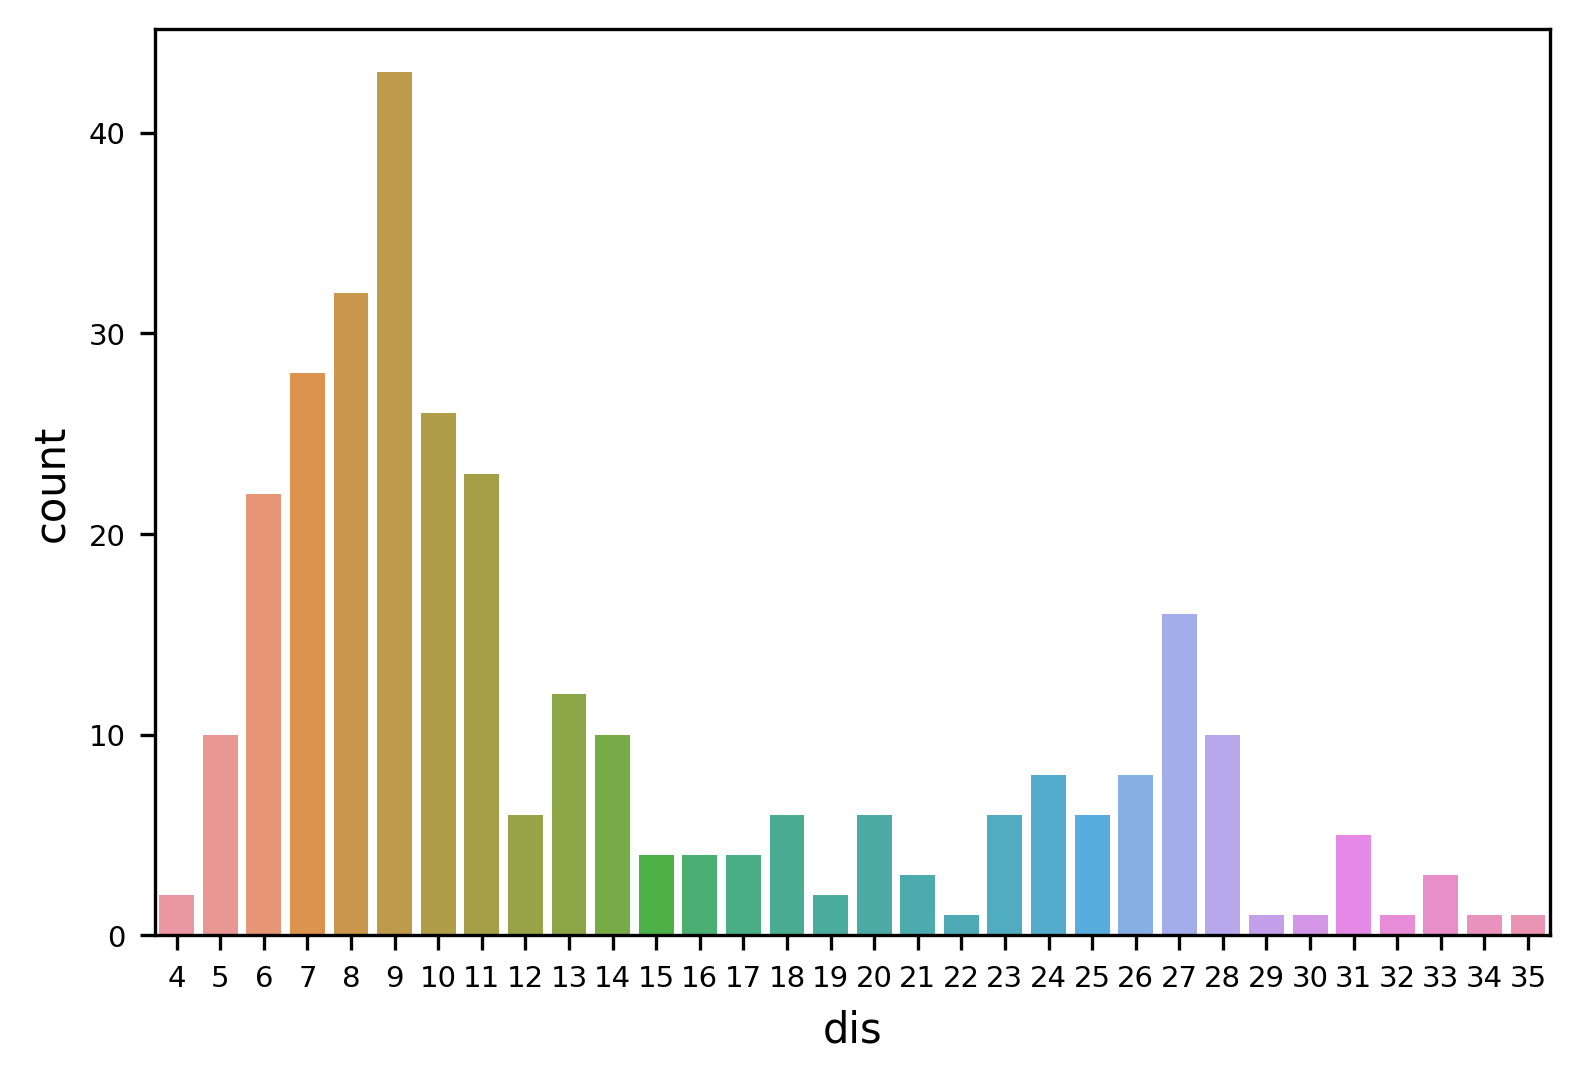

<IPython.core.display.Javascript object>

In [272]:
sns.countplot(
    first_eat_bean.groupby("file")
    .first()[["pacmanPos", "next_eat_rwd"]]
    .reset_index()
    .merge(
        locs_df[["pos1", "pos2", "dis"]],
        left_on=["pacmanPos", "next_eat_rwd"],
        right_on=["pos1", "pos2"],
        how="left",
    )
    .drop_duplicates()
    .dis
)

### pacman如何吃每个大区域的豆子

In [299]:
df_model = df_model.merge(
    df_model[["file", "index", "beans_global"]]
    .explode("beans_global")
    .groupby(["file", "index"])
    .apply(lambda x: list(x.beans_global.value_counts().values))
    .reset_index(),
    on=["file", "index"],
    how="left",
)

<IPython.core.display.Javascript object>

In [301]:
df_model = df_model.rename(columns={0: "beans_in_each_region"})

<IPython.core.display.Javascript object>

In [307]:
df_model[["file", "index", "beans_in_each_region"]][50:100]

,file,index,beans_in_each_region
50,10-1-Omega-16-Jul-2019.csv,215,"[6, 6, 6, 2, 2, 1]"
51,10-1-Omega-16-Jul-2019.csv,262,"[3, 3, 2, 1]"
52,10-1-Omega-16-Jul-2019.csv,263,"[3, 3, 2, 1]"
53,10-1-Omega-16-Jul-2019.csv,264,"[3, 3, 2, 1]"
54,10-1-Omega-16-Jul-2019.csv,265,"[3, 3, 2, 1]"
55,10-1-Omega-16-Jul-2019.csv,266,"[3, 3, 2, 1]"
56,10-1-Omega-16-Jul-2019.csv,267,"[3, 3, 2, 1]"
57,10-1-Omega-16-Jul-2019.csv,268,"[3, 2, 2, 1]"
58,10-1-Omega-16-Jul-2019.csv,269,"[3, 2, 2, 1]"
59,10-1-Omega-16-Jul-2019.csv,270,"[3, 2, 2, 1]"


<IPython.core.display.Javascript object>

### 模拟agent to eat energizer

In [94]:
def energizer_graze_agent(pos, beans, energizers, pacman_last_dir):
    #     set_trace()
    temp = locs_df_notunl[(locs_df_notunl.pos1 == pos) & (locs_df_notunl.dis == 5)]

    temp = (
        temp.assign(
            x1=temp.path.apply(lambda x: x[0][0]), x2=temp.path.apply(lambda x: x[0][1])
        )
        .merge(
            locs_df_notunl[["pos1", "pos2", "relative_dir"]].rename(
                columns={"relative_dir": "path_dir"}
            ),
            right_on=["pos1", "pos2"],
            left_on=["x1", "x2"],
            how="left",
            suffixes=["", "_add"],
        )
        .drop(columns=["pos1_add", "pos2_add", "x1", "x2", "relative_dir"])
    ).explode("path")

    df_stst = temp.assign(
        local_beans=temp.path.apply(lambda x: len(set(x) & set(beans))),
        turns=temp.path.apply(lambda x: len(set(x) & set(turning_pos))),
        if_energizer=temp.path.apply(lambda x: len(set(x) & set(energizers))),
    ).set_index("path_dir")

    if pd.isnull(pacman_last_dir):
        pass
    elif opposite_dirs[pacman_last_dir] in df_stst.index.values:
        df_stst = df_stst.drop(opposite_dirs[pacman_last_dir])
    else:
        pass

    if df_stst.if_energizer.sum() > 0:
        pick_dir = df_stst[df_stst.if_energizer > 0].index.values
    else:
        pick_dir = select_idx_index(
            -df_stst[df_stst.local_beans == df_stst.local_beans.max()].turns
        )
        
    if len(pick_dir) > 1 and pacman_last_dir in pick_dir:
        pick = pacman_last_dir
    else:
        pick = pick_dir[0]
    return (
        locs_df_notunl[
            (locs_df_notunl.pos1 == pos)
            & (locs_df_notunl.relative_dir == pick)
            & ((locs_df_notunl.dis == 1))
        ].pos2.values[0],
        pick,
    )

<IPython.core.display.Javascript object>

In [8]:
energizer_eat_start = (
    df_model.reset_index()
    .groupby(["file", "next_eat_energizer"])
    .level_0.first()
    .values
)

<IPython.core.display.Javascript object>

In [242]:
l_all = []
# for idx in energizer_eat_start[102:]:#59363,50764,18315,72049,51563,61146,73768,28025,28808,8798,35171,21529,21999,29982,68109,30982
for idx in [28025]:
    curr_row = df_model[df_model.index == idx].copy()
    curr_pos, curr_beans, energizers, pacman_dir = (
        curr_row["pacmanPos"].values[0],
        curr_row["beans"].values[0],
        curr_row["energizers"].values[0],
        curr_row["pacman_dir"].values[0],
    )
    #     print(curr_pos, len(curr_beans), energizers, pacman_dir)
    curr_path = [idx, curr_pos]
    if curr_pos not in forbidden_pos:
        for i in range(300):
            next_pos, pacman_dir = energizer_graze_agent(
                curr_pos, curr_beans, energizers, pacman_dir
            )
            curr_path.append(next_pos)
            if next_pos in energizers:
                break
            curr_beans = [c for c in curr_beans if c != curr_pos]

            curr_pos = next_pos
        l_all.append(curr_path)
        print(idx, next_pos, len(curr_path))

28025 (27, 6) 302


<IPython.core.display.Javascript object>

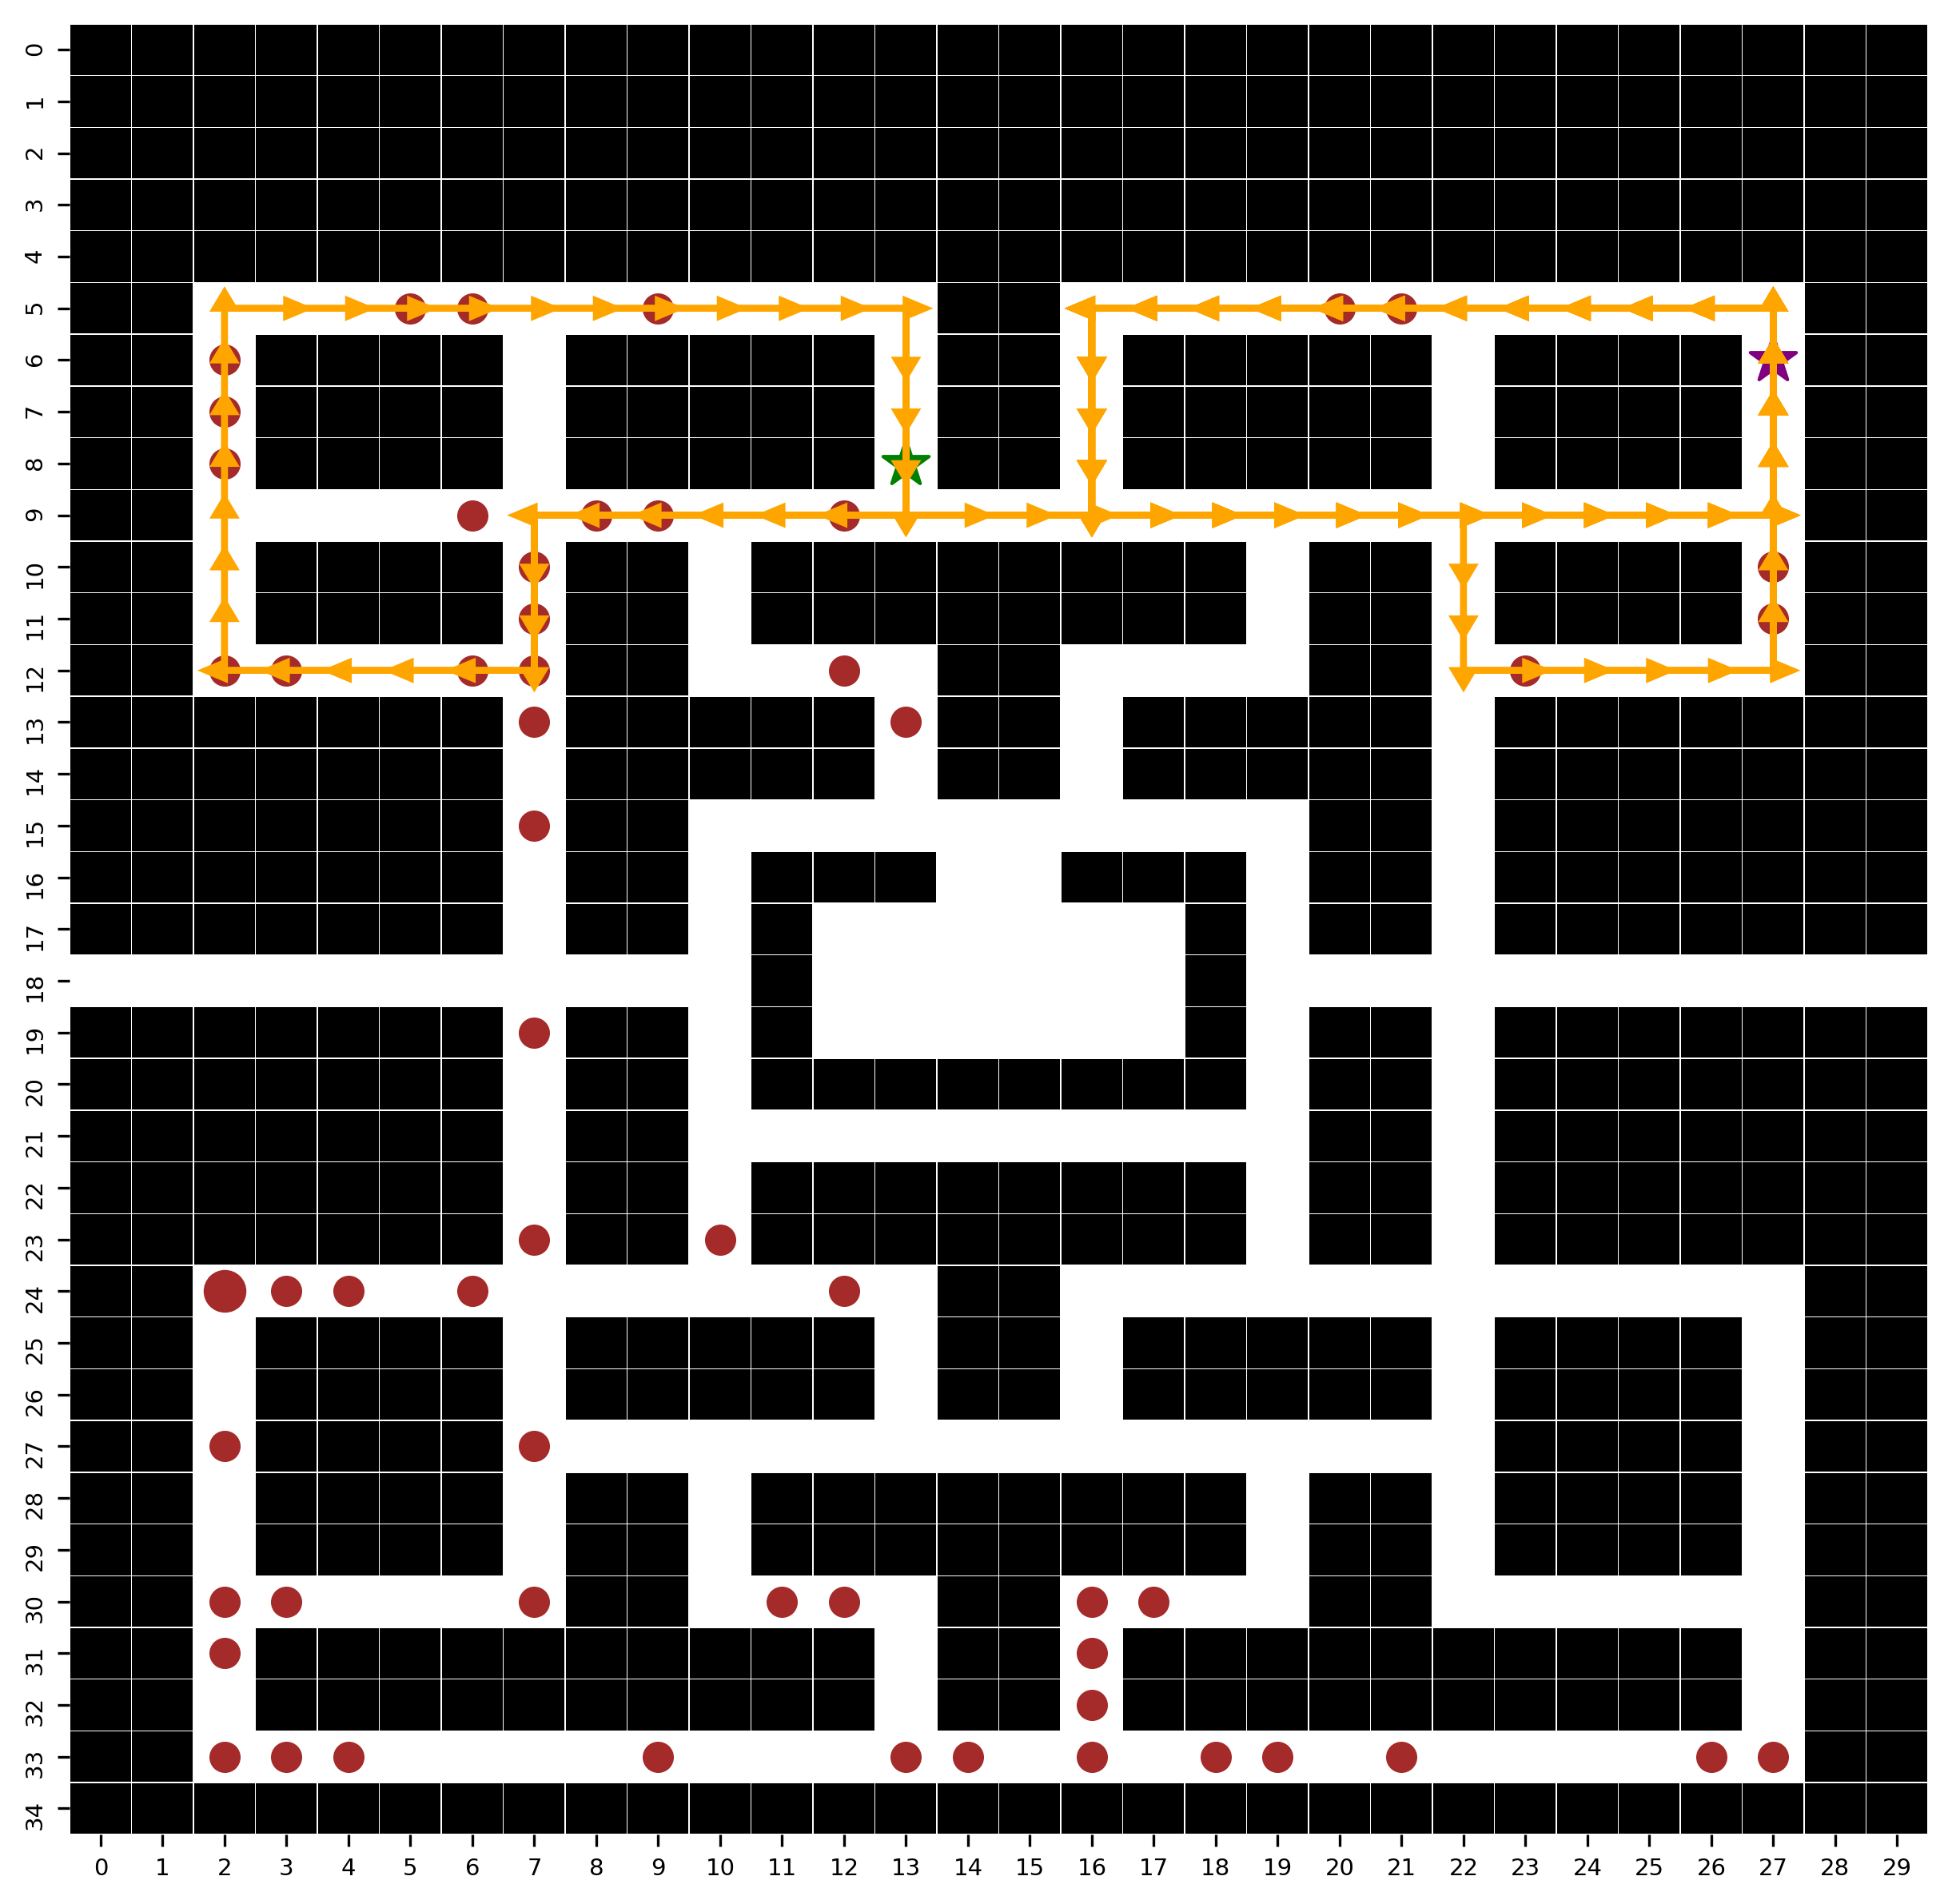

<IPython.core.display.Javascript object>

In [243]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(array, cbar=False, cmap="bone", linewidth=0.1)
p = pd.DataFrame(curr_path[1:])
xy = np.array(list(zip(*p.values))).T + 0.5
for start, stop in zip(xy[:-1], xy[1:]):
    x, y = zip(start, stop)
    x1, y1 = start
    x2, y2 = stop
    plt.arrow(
        x1,
        y1,
        x2 - x1,
        y2 - y1,
        linewidth=2,
        head_width=0.3,
        head_length=0.3,
        fc="orange",
        ec="orange",
    )

plt.scatter(
    x=[i[0] + 0.5 for i in df_model.loc[idx, "beans"]],
    y=[i[1] + 0.5 for i in df_model.loc[idx, "beans"]],
    color="brown",
    s=70,
)
plt.scatter(
    x=[i[0] + 0.5 for i in energizers],
    y=[i[1] + 0.5 for i in energizers],
    color="brown",
    s=140,
)
plt.scatter(
    df_model.loc[idx, "pacmanPos"][0] + 0.5,
    df_model.loc[idx, "pacmanPos"][1] + 0.5,
    color="green",
    marker="*",
    s=210,
)
plt.scatter(
    curr_path[-1][0] + 0.5, curr_path[-1][1] + 0.5, color="purple", marker="*", s=210,
)

In [108]:
actual = (
    df_model.assign(
        start_index=df_model.reset_index()
        .level_0.mask(~df_model.reset_index().level_0.isin(energizer_eat_start))
        .fillna(method="ffill")
        .values
    )
    .groupby("start_index")
    .apply(lambda x: list(x.pacmanPos.values))
)

simulated = pd.DataFrame({"path": [i[1:] for i in l_all]}, index=[i[0] for i in l_all])
compare_df = pd.concat([simulated, actual], 1)
compare_df.columns = ["simulated", "actual"]

<IPython.core.display.Javascript object>

#### Histogram of the simulated trajectory length

Text(0.5, 0, 'Simulated Trajectory Length')

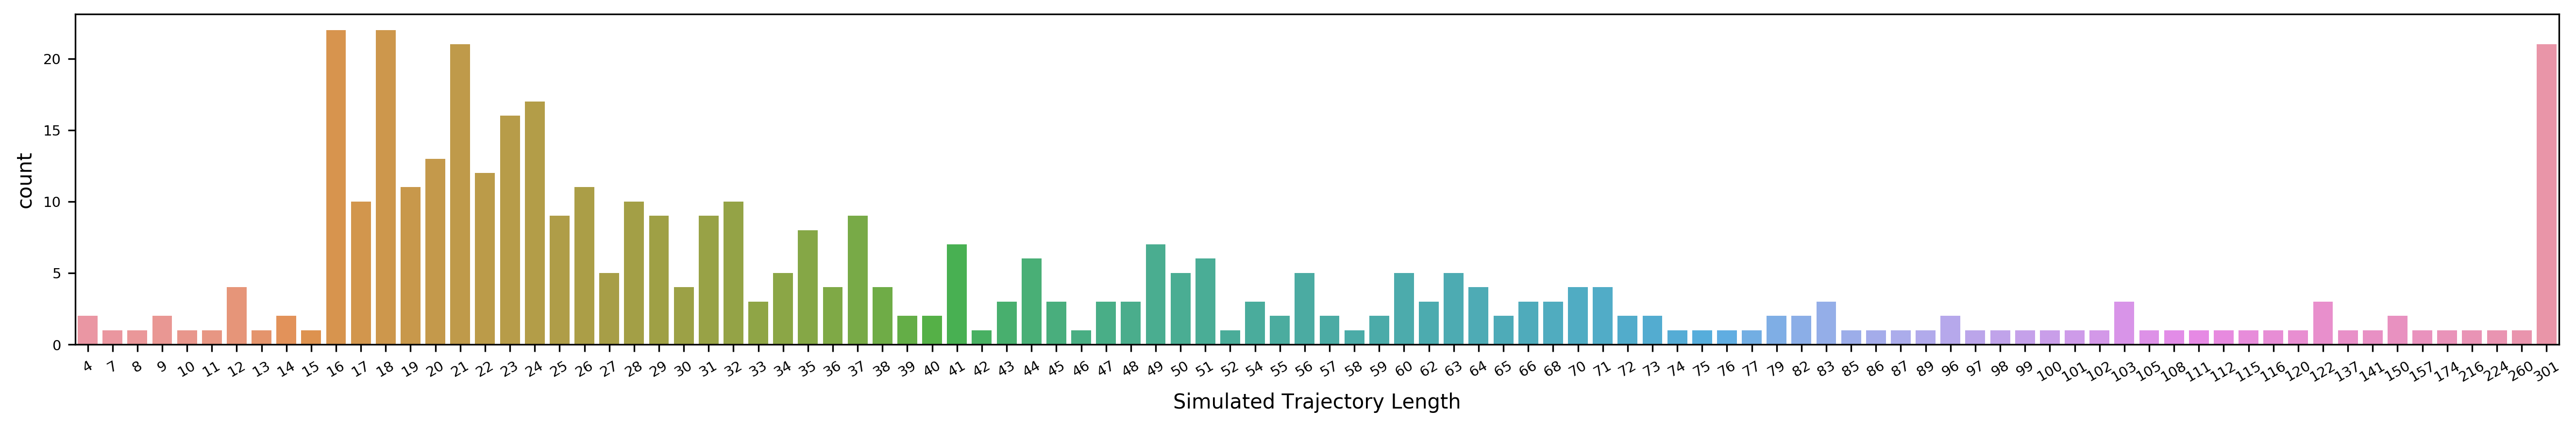

<IPython.core.display.Javascript object>

In [124]:
plt.subplots(figsize=(22, 3))
ax = sns.countplot(compare_df.simulated.dropna().map(len))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel("Simulated Trajectory Length")

#### The ratio to reach the energizer

In [170]:
if_reach_same_energizer = (
    compare_df.assign(
        sim_last=compare_df.simulated.apply(
            lambda x: x[-1] if not isinstance(x, float) else np.nan
        ),
        actual_last=compare_df.actual.apply(
            lambda x: x[-1] if not isinstance(x, float) else np.nan
        ),
    )
    .merge(
        locs_df,
        left_on=["sim_last", "actual_last"],
        right_on=["pos1", "pos2"],
        how="left",
    )
    .dis
    <= 2
)
if_reach_same_energizer.mean()

0.6527777777777778

<IPython.core.display.Javascript object>

#### Trajectory overlap rate

Text(0, 0.5, 'count')

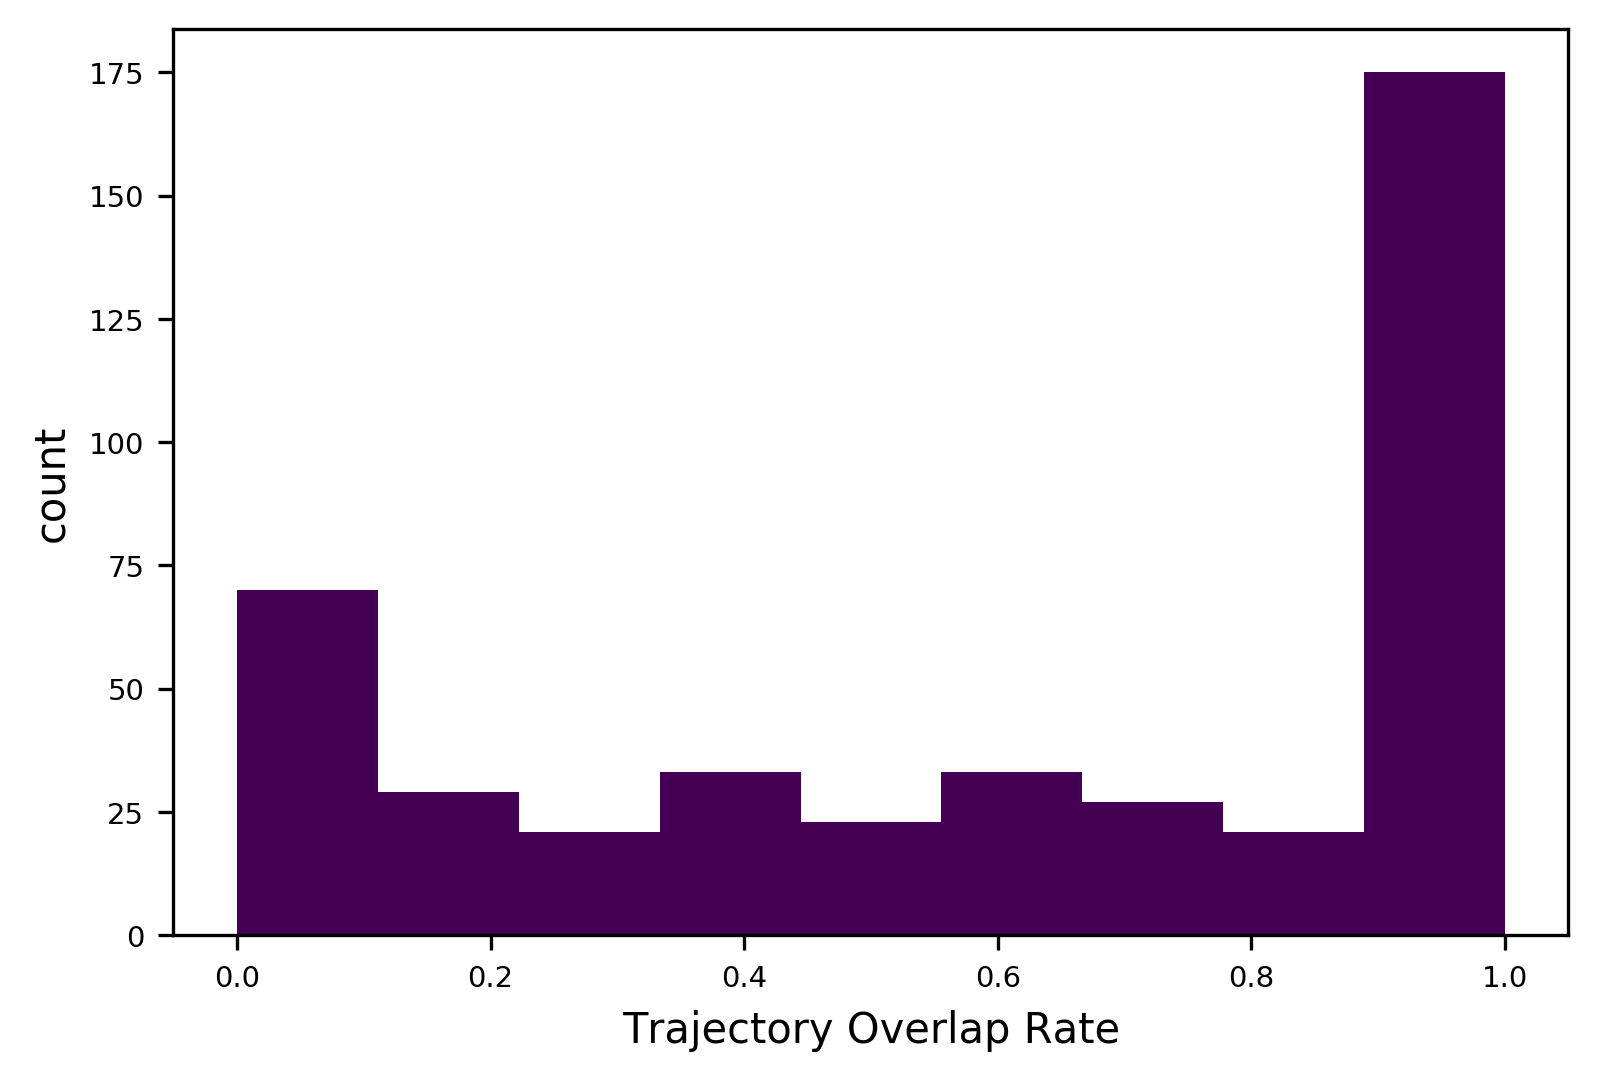

<IPython.core.display.Javascript object>

In [126]:
plt.rcParams["figure.dpi"] = 300
compare_df.apply(
    lambda x: len(set(x.simulated) & set(x.actual)) / len(x.actual)
    if not isinstance(x.simulated, float)
    else 0,
    1,
).hist(bins=np.linspace(0, 1, 10))
plt.grid(False)
plt.xlabel("Trajectory Overlap Rate")
plt.ylabel("count")

#### trajectory length histgram for ratio = 0.8~1

Text(0.5, 0, 'Trajectory Actual Length')

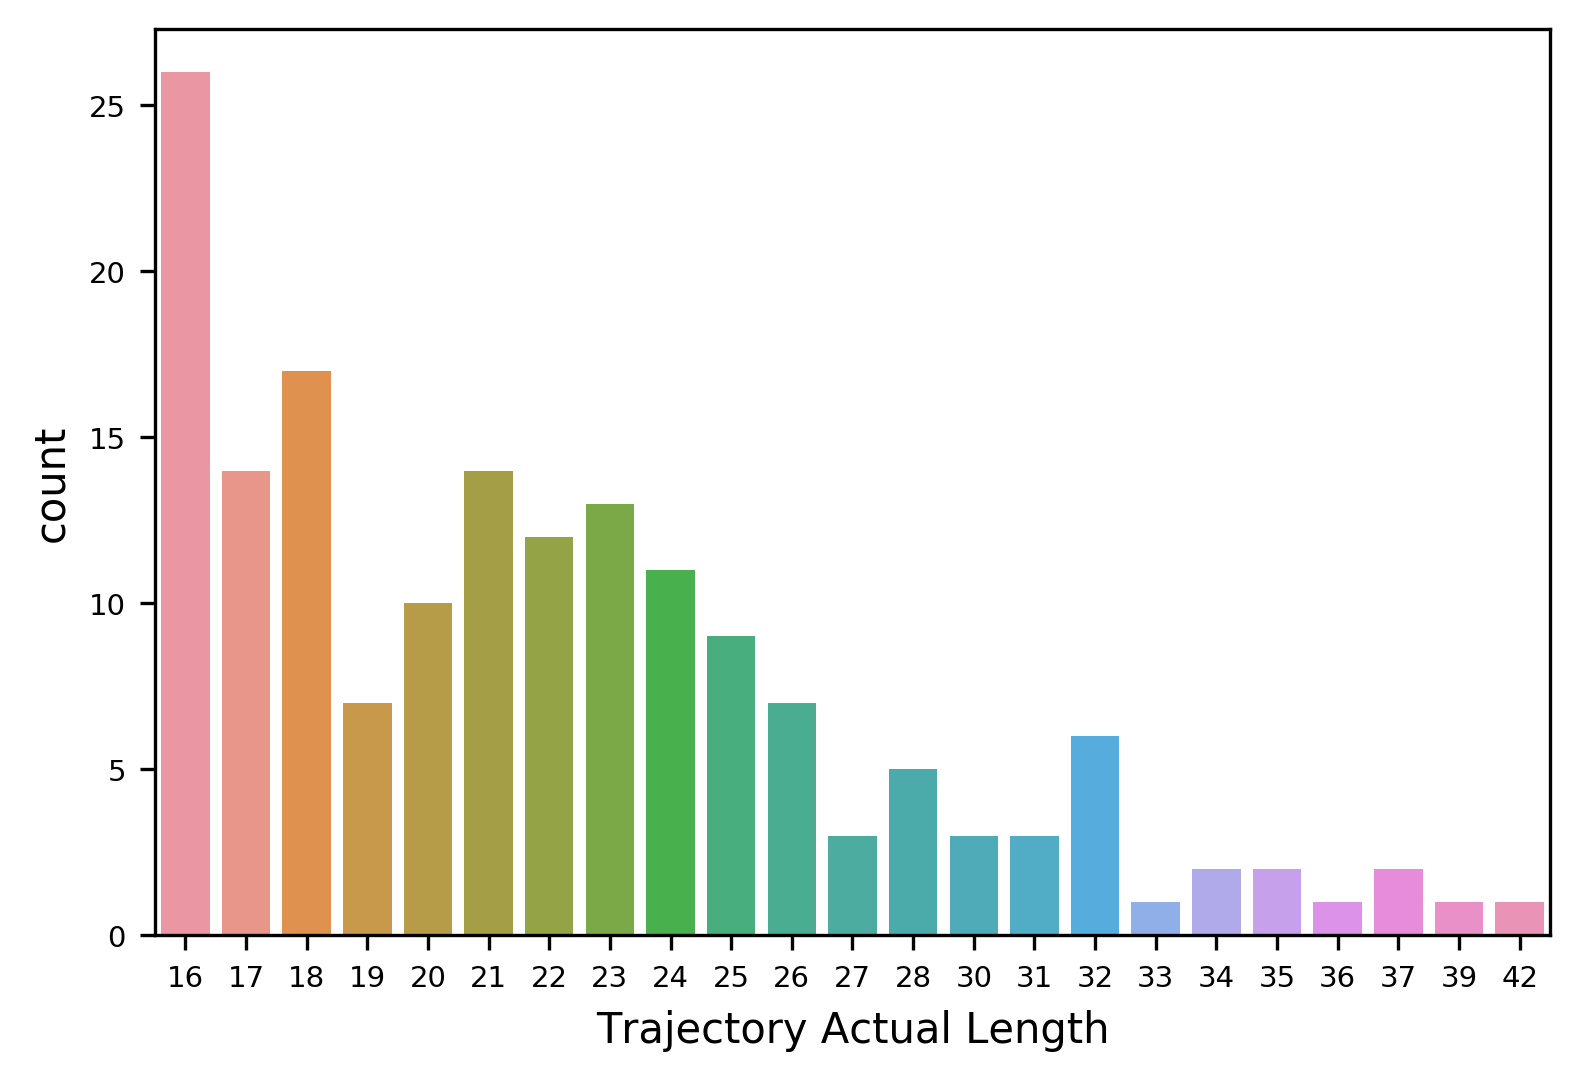

<IPython.core.display.Javascript object>

In [187]:
sns.countplot(
    compare_df[
        compare_df.apply(
            lambda x: len(set(x.simulated) & set(x.actual)) / len(x.actual)
            if not isinstance(x.simulated, float)
            else 0,
            1,
        )
        >= 0.9
    ].actual.map(len)
)
plt.xlabel("Trajectory Actual Length")

#### Histogram of efficiency

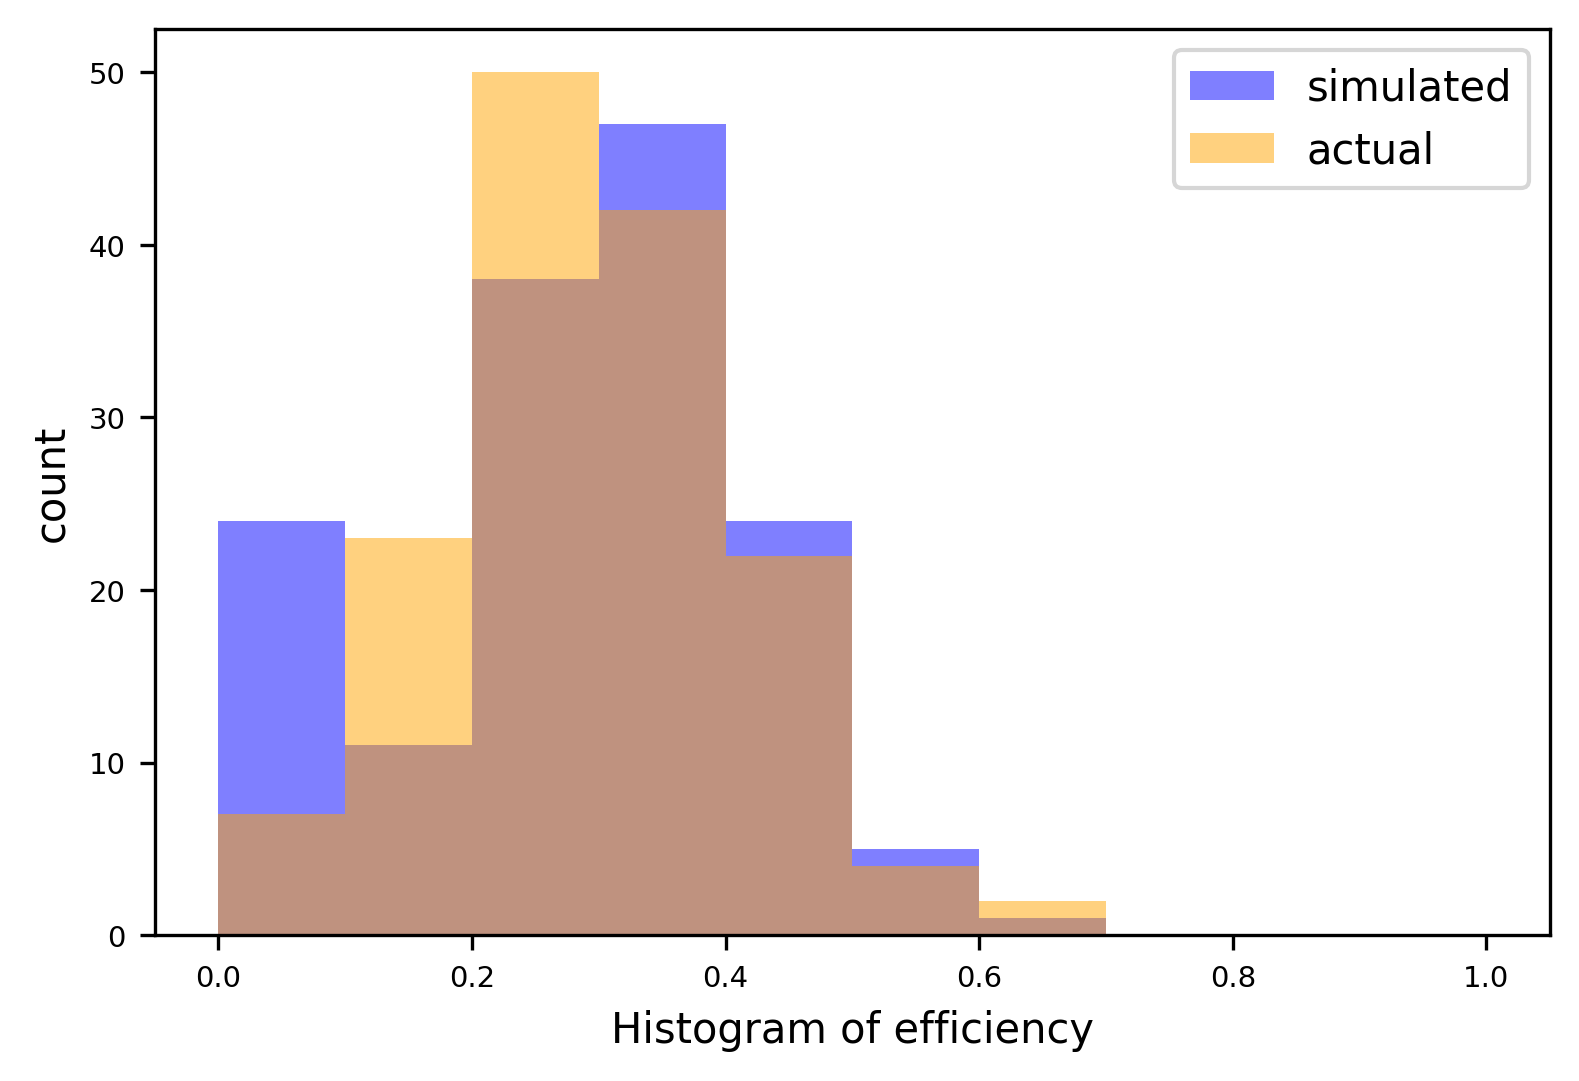

<IPython.core.display.Javascript object>

In [192]:
pd.Series(
    [
        len(set(df_model.loc[idx, "beans"]) & set(item["simulated"]))
        / len(item["simulated"])
        if not isinstance(item["simulated"], float)
        else 0
        for idx, item in compare_df.loc[
            (~if_reach_same_energizer.values) & (compare_df.actual.map(len) < 302)
        ].iterrows()
    ]
).hist(bins=np.linspace(0, 1, 11), color="blue", alpha=0.5)
plt.grid(False)

pd.Series(
    [
        len(set(df_model.loc[idx, "beans"]) & set(item["actual"])) / len(item["actual"])
        if not isinstance(item["actual"], float)
        else 0
        for idx, item in compare_df.loc[
            (~if_reach_same_energizer.values) & (compare_df.actual.map(len) < 302)
        ].iterrows()
    ]
).hist(bins=np.linspace(0, 1, 11), color="orange", alpha=0.5)
plt.grid(False)
plt.xlabel("Histogram of efficiency")
plt.ylabel("count")
plt.legend(["simulated", "actual"])

### Hot Pursuit: 区分追的形式——追还是堵截

In [ ]:
speed = []
for r in indexes_filtered:
    start = r[0]
    end = df_total.loc[r, "ifscared1"].where(lambda x: x == 3).dropna().index[0]
    eat_rwds = (
        df_total.loc[start:end, "rwd_cnt"].max()
        - df_total.loc[start:end, "rwd_cnt"].min()
    )
    best_route_ratio = len(
        set(df_total.loc[start:end, "pacmanPos"])
        & set(
            dijkstra_distance(
                df_total.loc[start, "pacmanPos"], df_total.loc[start, "ghost1Pos"]
            )[1:]
        )
    ) / len(set(df_total.loc[start:end, "pacmanPos"]))
    route_diff = (end - start) - len(
        dijkstra_distance(
            df_total.loc[start, "pacmanPos"], df_total.loc[start, "ghost1Pos"]
        )[1:]
    )
    try:
        start_new = (
            df_total.loc[start:end, "distance1"]
            .diff()
            .where(lambda x: x > 0)
            .dropna()
            .index[-1]
        )

        speed.append(
            [
                df_total.loc[start_new:end, "distance1"].max() / (end - start_new),
                "partial",
                best_route_ratio,
                eat_rwds,
                route_diff,
                all(df_total.loc[start_new:end, "status_h1"] == 1),
                all(df_total.loc[start_new:end, "status_g"] == 0),
            ]
        )
    except:
        speed.append(
            [
                df_total.loc[start:end, "distance1"].max() / (end - start),
                "full",
                best_route_ratio,
                eat_rwds,
                route_diff,
                all(df_total.loc[start:end, "status_h1"] == 1),
                all(df_total.loc[start:end, "status_g"] == 0),
            ]
        )

df_index = pd.DataFrame(
    speed,
    columns=[
        "speed",
        "if_complete",
        "best_route_ratio",
        "eat_rwds",
        "route_diff",
        "if_only_hunt",
        "if_no_graze",
    ],
).assign(idx=indexes_filtered, if_intercept=[s[0] >= 1 for s in speed])

df_index["start_distance"] = df_index.apply(
    lambda x: df_total.loc[x.idx, "distance1"].values[0], 1
)

In [ ]:
energizer_graze_agent((16,26),df_model.beans.values[0])

In [ ]:
sns.jointplot(x="eat_rwds", y="route_diff", data=df_index)

### Hot pursuit: 预测1）hunt/hunt+graze 2）only graze的joystick

In [ ]:
df_model = (
    df_total[
        (df_total.when_switch == df_total.index)
        & (df_total.handler.replace(handler_mapping) != df_total.pacman_dir)
        #     & (df_total.status_h1 == 1)  ## 这里调1）hunt/hunt+graze 2）only graze
        & (df_total.index.isin(list(itertools.chain.from_iterable(scared_to_eaten))))
    ]
    .dropna(subset=["pacman_dir"])
)
df_model["next_cross"] = df_model.apply(
    lambda x: next_cross(x.pacmanPos, x.pacman_dir), 1
)
df_model["next_possible_dir"] = df_model.apply(lambda x: dir_choices(x.next_cross), 1)

In [ ]:
df_model["nearbean_dir_big"] = df_model.apply(
    lambda x: next_cross_nearbean(x.pacmanPos, x.next_cross, x.beans), 1
)
df_model["nearbean_dir_big_global"] = df_model.apply(
    lambda x: dirs_global(x.pacmanPos, x.beans, x.next_cross, atcross=True), 1
)
df_model["if_go_straight_local"] = df_model.apply(
    lambda x: go_straight(x.pacmanPos, x.pacman_dir, x.beans), 1
)
df_model["if_go_straight_global"] = df_model.apply(
    lambda x: go_straight(x.pacmanPos, x.pacman_dir, x.beans, False), 1
)
df_model["energizer_dirs_big"] = df_model.apply(
    lambda x: approaching_energizer(x.next_cross, x.energizers), 1
)
df_model["energizer_dirs_big_global"] = df_model.apply(
    lambda x: dirs_global(x.pacmanPos, x.energizers, x.next_cross, atcross=True), 1
)

In [ ]:
local_features = [
    "pacman_dir",
    "nearbean_dir_big",
    "ghost1_wrt_pacman_big",
    "energizer_dirs_big",
    "next_possible_dir",
    "ghost_cross_over_dirs",
    "if_go_straight_local",
]
global_features = [
    "pacman_dir",
    "nearbean_dir_big_global",
    "ghost1_wrt_pacman_big_global",
    "energizer_dirs_big_global",
    "next_possible_dir",
    "ghost_cross_over_dirs_global",
    "if_go_straight_global",
]

In [ ]:
df_model.to_csv("df_model_scared.csv", index=False)

In [ ]:
state = "global"
# for t in range(1, 10):
if state == "local":
    df_model["ghost1_wrt_pacman_big"] = df_model.apply(
        lambda x: relative_dir(x.ghost1Pos, x.next_cross), 1,
    )
    df_model["ghost_cross_over_dirs"] = df_model.apply(
        lambda x: list(set(x.ghost1_wrt_pacman_big) & set(x.next_possible_dir)), 1
    )
    features = local_features
else:
    df_model["ghost1_wrt_pacman_big_global"] = df_model.apply(
        lambda x: relative_dir(global_pos(x.ghost1Pos), global_pos(x.next_cross)), 1,
    )
    df_model["ghost_cross_over_dirs_global"] = df_model.apply(
        lambda x: list(set(x.ghost1_wrt_pacman_big_global) & set(x.next_possible_dir)),
        1,
    )
    features = global_features
X = df_model[
    (
        df_model.assign(handlertext=df_total.handler.replace(handler_mapping),).apply(
            lambda x: x.handlertext in x.next_possible_dir
            if x.next_possible_dir and not isinstance(x.next_possible_dir, float)
            else False,
            1,
        )
    )
][features + ["index", "file", "handler"]]

les = {}
le = preprocessing.LabelEncoder()
for i in features:
    X[i] = le.fit_transform(X[i].astype(str))
    les[i] = dict(zip(le.transform(le.classes_), le.classes_))

X_train, X_test, Y_train, Y_test = train_test_split(
    X[features], X["handler"], test_size=0.3, random_state=0,
)

clf = DecisionTreeClassifier(class_weight="balanced", random_state=0)
clf.fit(X_train, Y_train)

y_pred = (
    pd.DataFrame(clf.predict_proba(X_test), columns=[1, 2, 3, 4]).mask(
        (
            1
            - pd.get_dummies(
                df_model.loc[X_test.index, "next_possible_dir"].apply(pd.Series).stack()
            ).sum(level=0)[["up", "down", "left", "right"]]
        )
        .astype(bool)
        .values
    )
).idxmax(axis=1)

print(accuracy_score(y_pred, Y_test))

In [ ]:
y_pred = (
    pd.DataFrame(clf.predict_proba(X.loc[:, features]), columns=[1, 2, 3, 4])
    .mask(
        (
            1
            - pd.get_dummies(
                df_model.loc[X.index, "next_possible_dir"].apply(pd.Series).stack()
            ).sum(level=0)[["up", "down", "left", "right"]]
        )
        .astype(bool)
        .values
    )
    .idxmax(axis=1)
)

accuracy_map = (
    df_model.loc[X.index, ["pacmanPos", "handler"]]
    .assign(prd=y_pred.values, check=y_pred.values == X.handler.values)
    .groupby("pacmanPos")
    .check.agg({"avg_accuracy": "mean", "handler": "count"},)
)

array = np.asarray(
    map_info.pivot_table(columns="Pos1", index="Pos2")
    .iswall.reindex(range(map_info.Pos2.max() + 1))
    .replace({1: F, np.nan: F, 0: T})
)

In [ ]:
import re

In [ ]:
plt.rcParams["figure.dpi"] = 300
f, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Scared: " + state.capitalize() + " Features Applied")
sns.heatmap(array, ax=ax, linewidth=0.5, annot=False, cbar=False, cmap="bone")
# sns.heatmap(array_accuracy, ax=ax, linewidth=0.5, annot=False, cmap="Oranges")
sc = ax.scatter(
    pd.Series(accuracy_map.index).apply(lambda x: x[0]) + 0.5,
    pd.Series(accuracy_map.index).apply(lambda x: x[1]) + 0.5,
    s=accuracy_map.handler * 8,
    c=accuracy_map.avg_accuracy,
    cmap="Oranges",
)
plt.colorbar(sc, aspect=80)
handles, labels = sc.legend_elements(prop="sizes", alpha=0.6)
legend2 = plt.legend(
    handles,
    [
        re.sub(
            re.search("[0-9]+", l).group(0),
            str(int(int(re.search("[0-9]+", l).group(0)) / 8)),
            l,
        )
        for l in labels
    ],
    ncol=4,
    title="Sample Size",
)

## 研究pacman是如何graze的

### 怎么吃energizer

In [ ]:
df_total = pd.concat(
    [
        df_total,
        df_total.groupby("file")
        .apply(lambda x: x.next_eat_rwd.mask(~x.eat_energizer).fillna(method="bfill"))
        .rename("next_eat_energizer")
        .reset_index()
        .drop(columns=["file"])
        .set_index("level_1"),
    ],
    1,
)

df_temp = df_total[["next_eat_energizer", "pacmanPos", "file", "index"]].merge(
    locs_df,
    left_on=["next_eat_energizer", "pacmanPos"],
    right_on=["pos2", "pos1"],
    how="left",
)

df_result = df_temp.groupby(["file", "next_eat_energizer"]).apply(
    lambda d: d.dropna(subset=["dis"]).index.max()
    - d.dropna(subset=["dis"]).dis.diff().where(lambda x: x > 0).dropna().index.max()
    if not pd.isnull(
        d.dropna(subset=["dis"]).dis.diff().where(lambda x: x > 0).dropna().index.max()
    )
    else d.dropna(subset=["dis"]).index.max() - d.dropna(subset=["dis"]).index.min()
)

energizer_data = (
    df_temp.groupby(["file", "next_eat_energizer"])
    .apply(
        lambda d: list(
            range(
                d.dropna(subset=["dis"])
                .dis.diff()
                .where(lambda x: x > 0)
                .dropna()
                .index.max(),
                d.dropna(subset=["dis"]).index.max() + 1,
            )
        )
        if not pd.isnull(
            d.dropna(subset=["dis"])
            .dis.diff()
            .where(lambda x: x > 0)
            .dropna()
            .index.max()
        )
        else list(
            range(
                d.dropna(subset=["dis"]).index.min(),
                d.dropna(subset=["dis"]).index.max(),
            )
        )
    )
    .reset_index()
)

energizer_data = (
    df_total.reset_index()
    .merge(energizer_data, on=["file", "next_eat_energizer"])
    .set_index("level_0")
)

energizer_data = energizer_data[energizer_data.apply(lambda x: x.name in x[0], 1)]

In [ ]:
plt.subplots(figsize=(15, 3))
ax = sns.countplot(df_result)
ax.set_xticklabels([i.get_text().split(".")[0] for i in ax.get_xticklabels()])
ax.set_xlabel("Last # Steps Pacman Dashes to Energizer in Shortest Route")

### 怎么吃水果

In [ ]:
df_total = df_total.merge(
    reward_dfs.loc[reward_dfs.Reward >= 3, ["rwdpos", "file",'Reward']]
    .drop_duplicates()
    .rename(columns={"rwdpos": "fruitPos"}),
    on="file",
    how="left",
)

In [ ]:
df_total = pd.concat(
    [
        df_total,
        df_total.groupby("file")
        .apply(
            lambda x: x.pacmanPos.mask(x.pacmanPos != x.fruitPos).fillna(method="bfill")
        )
        .rename("next_eat_fruit")
        .reset_index()
        .drop(columns=["file"])
        .set_index("level_1"),
    ],
    1,
)

In [ ]:
df_temp = df_total[["next_eat_fruit", "pacmanPos", "file", "index", "Reward"]].merge(
    locs_df,
    left_on=["next_eat_fruit", "pacmanPos"],
    right_on=["pos2", "pos1"],
    how="left",
)

df_result = df_temp.groupby(["file", "next_eat_fruit", "Reward"]).apply(
    lambda d: d.index.max() - d.dis.diff().where(lambda x: x > 0).dropna().index.max()
)

In [ ]:
fruit_dict = {3: "cherry", 4: "strawberry", 5: "orange", 6: "apple", 7: "melon"}
reward_dict = {3: 3, 4: 5, 5: 8, 6: 12, 7: 17}

In [ ]:
from matplotlib.ticker import MaxNLocator

for r in range(3, 8):
    plt.subplots(figsize=(15, 3))
    data = (
        df_result.reset_index()
        .where(lambda x: x.Reward == r)
        .dropna()[0]
        .value_counts()
        .reindex(range(2, 47))
        .reset_index()
    )
    ax = sns.barplot(data=data, x="index", y=0)
    #     ax.set(xticks=range(2, 47), xticklabels=[i for i in range(2, 47)])
    ax.set_xticklabels([i.get_text().split(".")[0] for i in ax.get_xticklabels()])
    ax.set_ylabel("count")
    ax.set_ylim([0, 6])
    ax.set_xlabel("Last # Steps Pacman Dashes to Fruit in Shortest Route")
    ax.set_title(fruit_dict[r] + ", reward: " + str(reward_dict[r]))

## simulate path: scared, from peak(hunt), tau=0-9, no status differentiation

In [ ]:
all_results = []
inter = 8
for t in range(10):
    overlap_part = []
    for idx, f in enumerate(from_last_peak):
        curr = f[0]
        path_result = [[df_total.loc[curr, "pacmanPos"]]]
        while (
            sum(
                [
                    compare_list(
                        df_total.loc[f[0] : f[0] + len(p) - 1, "ghost1Pos"].values, p,
                    )
                    for p in path_result
                ]
            )
            != len(path_result)
            and curr <= f[-1]
        ):
            path_result = dedup_list(
                [
                    p + i[1 : inter + 1]
                    for p in path_result
                    for i in all_shortest_paths(
                        G,
                        source=p[-1],
                        target=future_position(
                            df_total.loc[curr, "ghost1Pos"],
                            df_total.loc[curr, "ghost1_dir"],
                            t,
                            p[-1],
                        ),
                    )
                ]
            )
            curr += inter
        overlap_part.append(path_result)
    all_results.append(overlap_part)

In [ ]:
simulated_tbl = pd.DataFrame()
for a in range(len(all_results)):
    simulated_tbl = simulated_tbl.append(
        pd.DataFrame({"path_simulated": all_results[a]}).assign(
            path_actual=[
                remove_consecutive_dup(
                    df_total.loc[i, "pacmanPos"].tolist()
                    + [df_total.loc[i[-1], "ghost1Pos"]]
                )
                for i in from_last_peak
            ],
            file=[df_total.loc[i, "file"].tolist()[0] for i in from_last_peak],
            index=[df_total.loc[i, "index"].tolist() for i in from_last_peak],
            tau=a,
        )
    )

simulated_tbl.path_simulated = simulated_tbl.path_simulated.apply(shortest)
simulated_tbl = simulated_tbl.merge(
    reward_collective,
    left_on=["file", simulated_tbl["index"].apply(lambda x: x[0])],
    right_on=["file", "Step"],
    how="left",
)

simulated_tbl["pick_path"] = simulated_tbl.apply(
    lambda x: pick_morebean(x.path_simulated, x["beans"]), 1
)

simulated_tbl["accuracy"] = simulated_tbl.apply(
    lambda x: max(
        [len(set(i) & set(x.path_actual)) / len(x.path_actual) for i in x.pick_path]
    ),
    1,
)

simulated_tbl["pick_random"] = simulated_tbl.path_simulated.apply(
    lambda x: [x[random.sample(range(len(x)), 1)[0]]]
)

simulated_tbl["accuracy_random"] = simulated_tbl.apply(
    lambda x: max(
        [len(set(i) & set(x.path_actual)) / len(x.path_actual) for i in x.pick_random]
    ),
    1,
)

In [ ]:
simulated_tbl = pd.read_csv("simulated_tbl_best8.csv")
for c in ["path_simulated", "path_actual", "index", "beans", "pick_path"]:
    simulated_tbl[c] = simulated_tbl[c].map(eval)
simulated_tbl["pick_random"] = simulated_tbl.path_simulated.apply(
    lambda x: [x[random.sample(range(len(x)), 1)[0]]]
)

simulated_tbl["accuracy_random"] = simulated_tbl.apply(
    lambda x: max(
        [len(set(i) & set(x.path_actual)) / len(x.path_actual) for i in x.pick_random]
    ),
    1,
)
# simulated_tbl.to_csv("simulated_tbl_best8.csv", index=False)

### 基本数据分析

#### Subplot 1 & Subplot 4: Which inference scheme has the best predictive accuracy? | compare accuracy when random pick alternatives

In [ ]:
# df_trajectory = simulated_tbl.merge(
#     simulated_tbl[
#         (simulated_tbl.tau == 0) & (simulated_tbl.path_simulated.map(len) > 1)
#     ][["file", "Step"]].drop_duplicates(),
#     on=["file", "Step"],
# )

In [ ]:
plt.rcParams["figure.dpi"] = 300
simulated_tbl.groupby("tau").accuracy.mean().plot(marker="o")
simulated_tbl.groupby("tau").accuracy_random.mean().plot(marker="o")
plt.ylabel("trajectory overlap ratio")
plt.legend()

#### Subplot 2: Is the monkey use the identical inference scheme when it’s hunting?

In [ ]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["axes.prop_cycle"] = plt.cycler(
    "color", plt.cm.plasma(np.linspace(0, 1, 5))
)
simulated_tbl.assign(
    trajectory_length=pd.cut(
        simulated_tbl.path_actual.map(len), [0, 5, 10, 15, 20, 100]
    )
).pivot_table(
    columns="tau", index="trajectory_length", values="accuracy", aggfunc="mean",
)[
    [0, 2, 4, 6, 8]
].plot(
    figsize=(6, 3), marker="o"
)
plt.legend(ncol=3)
plt.ylabel("trajectory overlap ratio")
# plt.axes().set_xticklabels(["0-4", "5-9", "10-14", "15-19", "20+"])

In [ ]:
ax = (
    simulated_tbl.assign(
        trajectory_length=pd.cut(
            simulated_tbl.path_actual.map(len), [0, 5, 10, 15, 20, 100]
        )
    )[simulated_tbl.tau == 0]
    .trajectory_length.value_counts()
    .sort_index()
    .plot(kind="bar", figsize=(6, 3))
)
plt.ylabel("trial count")
plt.xlabel("trajectory length range")
ax.set_xticklabels([i.get_text() for i in ax.get_xticklabels()], rotation=0)

#### Subplots 3: Give some examples to show the prediction accuracy.

In [ ]:
# upzip("Archive.zip", "DataHMM_plot/")

In [ ]:
Process_dict_plot = {}
Rewards_dict_plot = {}
path = "DataHMM_plot/"
for d in os.listdir(path):
    if "Omega" in d:
        Process_dict_plot = take_record_df(path + d, Process_dict_plot)
        Rewards_dict_plot = take_reward_df(
            path + d + "/Rewards/", Process_dict_plot, Rewards_dict_plot
        )

In [ ]:
df_total_plot = (
    (
        pd.concat(Process_dict_plot)
        .reset_index()
        .rename(columns={"level_0": "file", "level_1": "index"})
    )
    .merge(
        locs_df,
        left_on=["pacmanPos", "ghost1Pos"],
        right_on=["pos1", "pos2"],
        how="left",
    )
    .drop(columns=["pos1", "pos2"])
    .rename(columns={"dis": "distance1"})
    .groupby("file")
    .apply(ghost_dir)
)

df_total_plot.ghost1_dir = df_total_plot.ghost1_dir.fillna(method="ffill")

In [ ]:
indexes = [
    list(i)
    for i in consecutive_groups(df_total_plot[df_total_plot.ifscared1 >= 3].index)
]
indexes_filtered = [
    i for i in indexes if (df_total_plot.loc[i, "ifscared1"] == 3).sum() > 0
]
scared_to_eaten = [
    list(
        range(
            i[0],
            df_total_plot.loc[i, "ifscared1"].where(lambda x: x == 3).dropna().index[0]
            + 1,
        )
    )
    for i in indexes_filtered
]

from_last_peak = [
    list(
        range(
            df_total_plot.loc[i, "distance1"]
            .diff()
            .where(lambda x: x > 0)
            .dropna()
            .index[-1],
            i[-1] + 1,
        )
    )
    if len(
        df_total_plot.loc[i, "distance1"].diff().where(lambda x: x > 0).dropna().index
    )
    > 0
    else i
    for i in scared_to_eaten
]

In [ ]:
all_results = []
inter = 8
for t in [0, 4, 5]:
    overlap_part = []
    for idx, f in enumerate(from_last_peak):
        curr = f[0]
        path_result = [[df_total_plot.loc[curr, "pacmanPos"]]]
        while (
            sum(
                [
                    compare_list(
                        df_total_plot.loc[f[0] : f[0] + len(p) - 1, "ghost1Pos"].values,
                        p,
                    )
                    for p in path_result
                ]
            )
            != len(path_result)
            and curr <= f[-1]
        ):
            path_result = dedup_list(
                [
                    p + i[1 : inter + 1]
                    for p in path_result
                    for i in all_shortest_paths(
                        G,
                        source=p[-1],
                        target=future_position(
                            df_total_plot.loc[curr, "ghost1Pos"],
                            df_total_plot.loc[curr, "ghost1_dir"],
                            t,
                            p[-1],
                        ),
                    )
                ]
            )
            curr += inter
        overlap_part.append(path_result)
    all_results.append(overlap_part)

In [ ]:
mp = {0: 0, 1: 4, 2: 5}
simulated_tbl = pd.DataFrame()
for a in range(len(all_results)):
    simulated_tbl = simulated_tbl.append(
        pd.DataFrame({"path_simulated": all_results[a]}).assign(
            path_actual=[
                remove_consecutive_dup(
                    df_total_plot.loc[i, "pacmanPos"].tolist()
                    + [df_total_plot.loc[i[-1], "ghost1Pos"]]
                )
                for i in from_last_peak
            ],
            file=[df_total_plot.loc[i, "file"].tolist()[0] for i in from_last_peak],
            index=[df_total_plot.loc[i, "index"].tolist() for i in from_last_peak],
            tau=mp[a],
        )
    )

simulated_tbl.path_simulated = simulated_tbl.path_simulated.apply(shortest)
simulated_tbl = simulated_tbl.merge(
    reward_collective,
    left_on=["file", simulated_tbl["index"].apply(lambda x: x[0])],
    right_on=["file", "Step"],
    how="left",
)

simulated_tbl["pick_path"] = simulated_tbl.apply(
    lambda x: pick_morebean(x.path_simulated, x["beans"]), 1
)

simulated_tbl["accuracy"] = simulated_tbl.apply(
    lambda x: max(
        [len(set(i) & set(x.path_actual)) / len(x.path_actual) for i in x.pick_path]
    ),
    1,
)

simulated_tbl["pick_random"] = simulated_tbl.path_simulated.apply(
    lambda x: [x[random.sample(range(len(x)), 1)[0]]]
)

simulated_tbl["accuracy_random"] = simulated_tbl.apply(
    lambda x: max(
        [len(set(i) & set(x.path_actual)) / len(x.path_actual) for i in x.pick_random]
    ),
    1,
)

In [ ]:
plt.rcParams["axes.prop_cycle"] = plt.cycler(
    "color", plt.cm.plasma(np.linspace(0, 1, 3))
)

sel = simulated_tbl[
    (simulated_tbl.file == "18-1-Omega-15-Jun-2019.csv")
    & (simulated_tbl.tau.isin([0, 4, 5]))
]

for i in [0, 4]:
    #     plt.subplots()
    plot_eating_simple(
        df_pos=df_total_plot[df_total_plot.file == sel.file.values[0]].set_index(
            "index"
        ),
        k=sel.file.values[0].split(".")[0],
        idx=sel["index"].values[0][0],
        Rewards_dict=Rewards_dict_plot,
    )
    #     if i == 0:
    #         plt.plot(
    #             pd.DataFrame(sel[sel.tau == i].pick_path.values[0][0] + [(27, 24)])[0]
    #             + 0.5,
    #             pd.DataFrame(sel[sel.tau == i].pick_path.values[0][0] + [(27, 24)])[1]
    #             + 0.5,
    #             marker="x",
    #             label=i,
    #         )
    #     else:
    plt.plot(
        pd.DataFrame(sel[sel.tau == i].pick_path.values[0][0])[0] + 0.5,
        pd.DataFrame(sel[sel.tau == i].pick_path.values[0][0])[1] + 0.5,
        linewidth=3,
        #         marker="j",
        label=i,
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    by_label.pop("Y")
    plt.legend(by_label.values(), list(by_label.keys())[:-1] + ["tau = " + str(i)])

In [ ]:
df_total[df_total.file == "16-2-Omega-21-Aug-2019.csv"]

In [ ]:
plt.rcParams["figure.dpi"] = 300
fig, subplots = plt.subplots(
    1, 10, sharey=True, figsize=(15, 3), subplot_kw={"ylim": (0, 40)}
)
# [
#     sns.distplot(
#         simulated_tbl[simulated_tbl.tau == i].path_actual.map(len).values,
#         ax=sp,
#         #         norm_hist=True,
#         kde=False,
#         hist_kws={
#             "histtype": "step",
#             "linewidth": 2,
#             "alpha": 1,
#             "color": "grey",
#             "weights": [100 / simulated_tbl[simulated_tbl.tau == i].shape[0]]
#             * simulated_tbl[simulated_tbl.tau == i].shape[0],
#         },
#     )
#     for i, sp in enumerate(subplots.reshape(-1))
# ]
[
    sns.distplot(
        simulated_tbl[(simulated_tbl.tau == i) & (simulated_tbl.accuracy == 1)]
        .path_simulated.apply(lambda x: len(x[0]))
        .values,
        ax=sp,
        #         norm_hist=True,
        kde=False,
        hist_kws={
            "histtype": "step",
            "linewidth": 2,
            "alpha": 1,
            "color": "black",
            "weights": [
                100
                / simulated_tbl[
                    (simulated_tbl.tau == i) & (simulated_tbl.accuracy == 1)
                ].shape[0]
            ]
            * simulated_tbl[
                (simulated_tbl.tau == i) & (simulated_tbl.accuracy == 1)
            ].shape[0],
        },
    )
    for i, sp in enumerate(subplots.reshape(-1))
]
[sp.set_title("tau = " + str(i)) for i, sp in enumerate(subplots.reshape(-1))]
fig.text(0.09, 0.5, "Percentage", va="center", rotation="vertical")
fig.text(0.5, -0.03, "trajectory length", ha="center")
fig.text(0.5, 1, "simulated_trajectory when accuracy = 1", ha="center")
# plt.legend(
#     ["actual_trajectory", "simulated_trajectory"],
#     fancybox=True,
#     framealpha=0,
#     bbox_to_anchor=(1, 1),
#     loc="upper left",
# )

In [ ]:
plt.rcParams["figure.dpi"] = 300
fig, subplots = plt.subplots(
    1, 10, sharey=True, figsize=(15, 3), subplot_kw={"ylim": (0, 100)}
)
[
    simulated_tbl[simulated_tbl.tau == i].accuracy.hist(
        ax=sp,
        weights=[100 / simulated_tbl[simulated_tbl.tau == i].shape[0]]
        * simulated_tbl[simulated_tbl.tau == i].shape[0],
    )
    for i, sp in enumerate(subplots.reshape(-1))
]
[sp.set_title("tau = " + str(i)) for i, sp in enumerate(subplots.reshape(-1))]
fig.text(0.08, 0.5, "Percentage", va="center", rotation="vertical")
fig.text(0.5, -0.03, "accuracy", ha="center")

### 分析pacman为什么在多个最近路线选择的情况下选择当前路线

In [ ]:
multiple_df = simulated_tbl[
    (simulated_tbl.accuracy == 1) & (simulated_tbl.path_simulated.map(len) > 1)
]

In [ ]:
sel = multiple_df.sample(1)
aa = pd.DataFrame(
    sel.path_simulated.values[0]
    + [
        df_total.loc[
            (df_total["index"].isin(sel["index"].values[0]))
            & (df_total.file == sel.file.values[0]),
            "ghost1Pos",
        ].tolist()
    ]
    + [sel.path_actual.values[0]]
    + sel.pick_path.values[0]
).T
aa.columns = list(range(len(sel.path_simulated.values[0]))) + [
    "ghost",
    "pacman_actual",
    "pick",
]

print(
    [
        len(set(sel.path_simulated.values[0][i]) & set(sel.path_actual.values[0]))
        for i in range(len(sel.path_simulated.values[0]))
    ]
)

print(
    [
        len(sel.path_simulated.values[0][i])
        for i in range(len(sel.path_simulated.values[0]))
    ]
)

In [ ]:
## tau比较大的时候靠的近的时候容易引起误差，这样会走回头路
## 两条路豆子差不多时，倾向于走拐弯少的路

In [ ]:
plt.rcParams["axes.prop_cycle"] = plt.cycler(
    "color", plt.cm.plasma(np.linspace(0, 1, 3))
)
plot_eating_all(
    df_pos=df_total[df_total.file == sel.file.values[0]].set_index("index"),
    k=sel.file.values[0].split(".")[0],
    idx=sel["index"].values[0][0],
    Rewards_dict=Rewards_dict,
)
for i in range(len(sel.path_simulated.values[0])):
    plt.plot(
        pd.DataFrame(sel.path_simulated.values[0][i])[0] + 0.5,
        pd.DataFrame(sel.path_simulated.values[0][i])[1] + 0.5,
        marker="o",
        label=i,
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    by_label.pop("Y")
    plt.legend(by_label.values(), by_label.keys())

## 动画

In [16]:
plt.rcParams["figure.dpi"] = 100
# haha = df_total.loc[from_last_peak[1]]
# print(haha.pred.replace(handler_mapping).values[0])
# print(haha.predict.values[0])
# sel = df_model.sample(1)
# sel_file = sel.file.values[0].split(".")[0]  # suicide = 1 and graze = 1

sel_file = "12-1-Omega-28-Aug-2019"
df_explore = df_total[df_total.file == sel_file + ".csv"].set_index("index")

w = interact(
    plot_eating_all,
    k=fixed(sel_file),
    df_pos=fixed(df_explore),
    Rewards_dict=fixed(Rewards_dict),
    idx=(
        widgets.IntSlider(
            min=df_explore.index.min(),
            max=df_explore.index.max(),
            step=1,
            #             value=sel["index"].values[0],
            value=104,
        )
    ),
)

interactive(children=(IntSlider(value=104, description='idx', max=187), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>